In [2]:
from ml_config import *
import gen as g

## 1. 제일 많이 보는 시간대에서 보는 쿠폰 종류 
(오전 11~12시 / 저녁 8~11시)

In [4]:
view = g.view()
view["I_DATE"] = pd.to_datetime(view["I_DATE"]) 
view["I_YEAR"] = view["I_DATE"].dt.year 
view["I_MONTH"] = view["I_DATE"].dt.month 
view["I_HOUR"] = view["I_DATE"].dt.hour
view["I_WEEKDAY"] = view["I_DATE"].dt.weekday

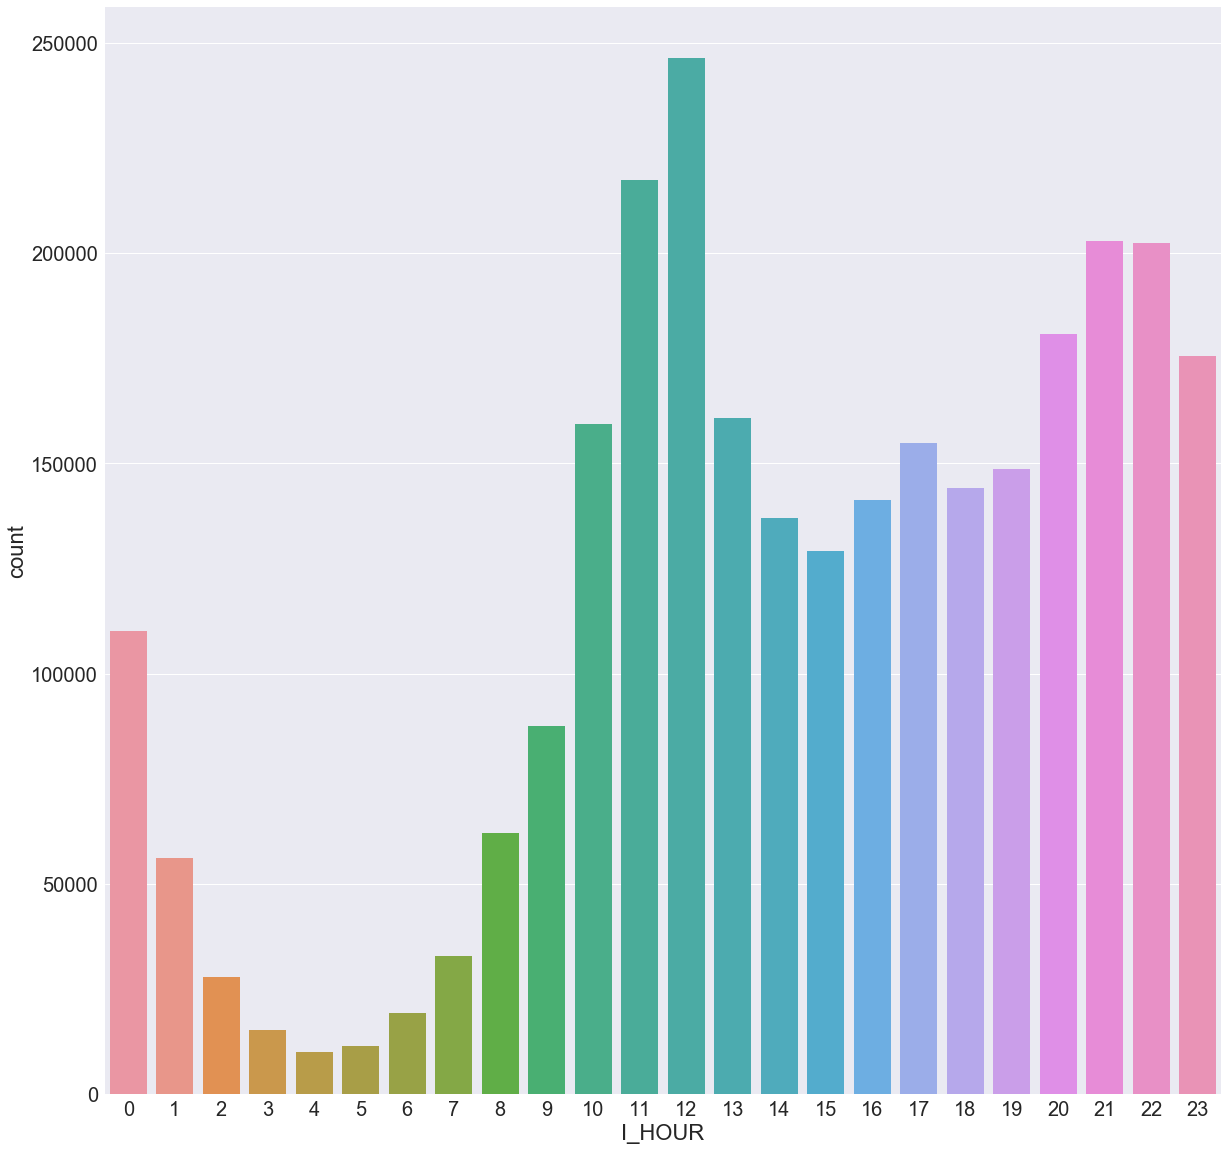

In [6]:
sns.set(font_scale=2)
plt.figure(figsize=(20, 20))
sns.countplot('I_HOUR',data=view)

In [7]:
morning = view[(11<=view['I_HOUR']) & (view['I_HOUR']<=12)]

In [12]:
len(morning)

463893

# 오전 11~12시에 46만번 조회

In [14]:
morning.head()

,PURCHASE_FLG,I_DATE,PAGE_SERIAL,REFERRER_hash,VIEW_COUPON_ID_hash,USER_ID_hash,SESSION_ID_hash,PURCHASEID_hash,I_YEAR,I_MONTH,I_HOUR,I_WEEKDAY
50,0,2012-04-03 12:02:56,2,1280d2e94c507864438af604104545e4,716abc8dcbfee15cf79e7c25c77a2456,560574a339f1b25e57b0221e486907ed,3362baac5cdd1fdad9362ec52250a59d,NaN,2012,4,12,1
58,0,2012-04-20 12:00:12,2,7d3892e54acb559ae36c459978489330,a5cf15957c944859fb1b437e60f3fdee,560574a339f1b25e57b0221e486907ed,98f123f8daa46551691980807c200b55,NaN,2012,4,12,4
76,0,2012-05-15 11:12:51,2,1280d2e94c507864438af604104545e4,d0590f9b80fd6aa59a31808a41dfd00c,560574a339f1b25e57b0221e486907ed,0432c628dc456435d0f8eccd512ab6c1,NaN,2012,5,11,1
84,0,2012-06-06 12:02:37,2,7d3892e54acb559ae36c459978489330,8b65083c2b663381d4344779baa1f028,560574a339f1b25e57b0221e486907ed,47614ae6c4eb61e08f24e3b4cfa66183,NaN,2012,6,12,2
85,0,2012-06-06 12:09:51,4,7d3892e54acb559ae36c459978489330,4b4a03629482c17c3b83b46c2704a1d1,560574a339f1b25e57b0221e486907ed,47614ae6c4eb61e08f24e3b4cfa66183,NaN,2012,6,12,2


In [15]:
coupon = g.coupon()

In [17]:
merged = pd.merge(morning, coupon, left_on='VIEW_COUPON_ID_hash', right_on='COUPON_ID_hash')

# merged = 오전 11~12시 쿠폰정보

In [19]:
merged.head()

,PURCHASE_FLG,I_DATE,PAGE_SERIAL,REFERRER_hash,VIEW_COUPON_ID_hash,USER_ID_hash,SESSION_ID_hash,PURCHASEID_hash,I_YEAR,I_MONTH,...,USABLE_DATE_THU,USABLE_DATE_FRI,USABLE_DATE_SAT,USABLE_DATE_SUN,USABLE_DATE_HOLIDAY,USABLE_DATE_BEFORE_HOLIDAY,large_area_name,ken_name,small_area_name,COUPON_ID_hash
0,0,2012-04-03 12:02:56,2,1280d2e94c507864438af604104545e4,716abc8dcbfee15cf79e7c25c77a2456,560574a339f1b25e57b0221e486907ed,3362baac5cdd1fdad9362ec52250a59d,NaN,2012,4,...,1.0,1.0,1.0,1.0,1.0,1.0,Kanto,Tokyo,"Shinjuku, Takadanobaba Nakano - Kichijoji",716abc8dcbfee15cf79e7c25c77a2456
1,0,2012-04-04 12:40:21,8,770955bb86ea739548078b91a9ea80b8,716abc8dcbfee15cf79e7c25c77a2456,8911bb741a4ad61fd0b349fbf6c288c2,2fc009468bcb6ef4d04d272ae806d1a3,NaN,2012,4,...,1.0,1.0,1.0,1.0,1.0,1.0,Kanto,Tokyo,"Shinjuku, Takadanobaba Nakano - Kichijoji",716abc8dcbfee15cf79e7c25c77a2456
2,0,2012-03-31 12:32:24,1,7d3892e54acb559ae36c459978489330,716abc8dcbfee15cf79e7c25c77a2456,271770b86816465a48b2c9115f7f2de1,a7f883dcbc6441bf5f72204e3211d7de,NaN,2012,3,...,1.0,1.0,1.0,1.0,1.0,1.0,Kanto,Tokyo,"Shinjuku, Takadanobaba Nakano - Kichijoji",716abc8dcbfee15cf79e7c25c77a2456
3,0,2012-04-30 11:53:30,4,74f282cd258a7acc9fbf4e9bb0599864,716abc8dcbfee15cf79e7c25c77a2456,271770b86816465a48b2c9115f7f2de1,7b80a5cefdef32d1dcec93164b8e9add,NaN,2012,4,...,1.0,1.0,1.0,1.0,1.0,1.0,Kanto,Tokyo,"Shinjuku, Takadanobaba Nakano - Kichijoji",716abc8dcbfee15cf79e7c25c77a2456
4,0,2012-04-03 11:12:08,6,48243ea50a35bb107fafd46a461b0b28,716abc8dcbfee15cf79e7c25c77a2456,79cf44afa9a63178296aa7b54374973c,c3e4adeca1d8021aed2c89f93ef7eccc,NaN,2012,4,...,1.0,1.0,1.0,1.0,1.0,1.0,Kanto,Tokyo,"Shinjuku, Takadanobaba Nakano - Kichijoji",716abc8dcbfee15cf79e7c25c77a2456


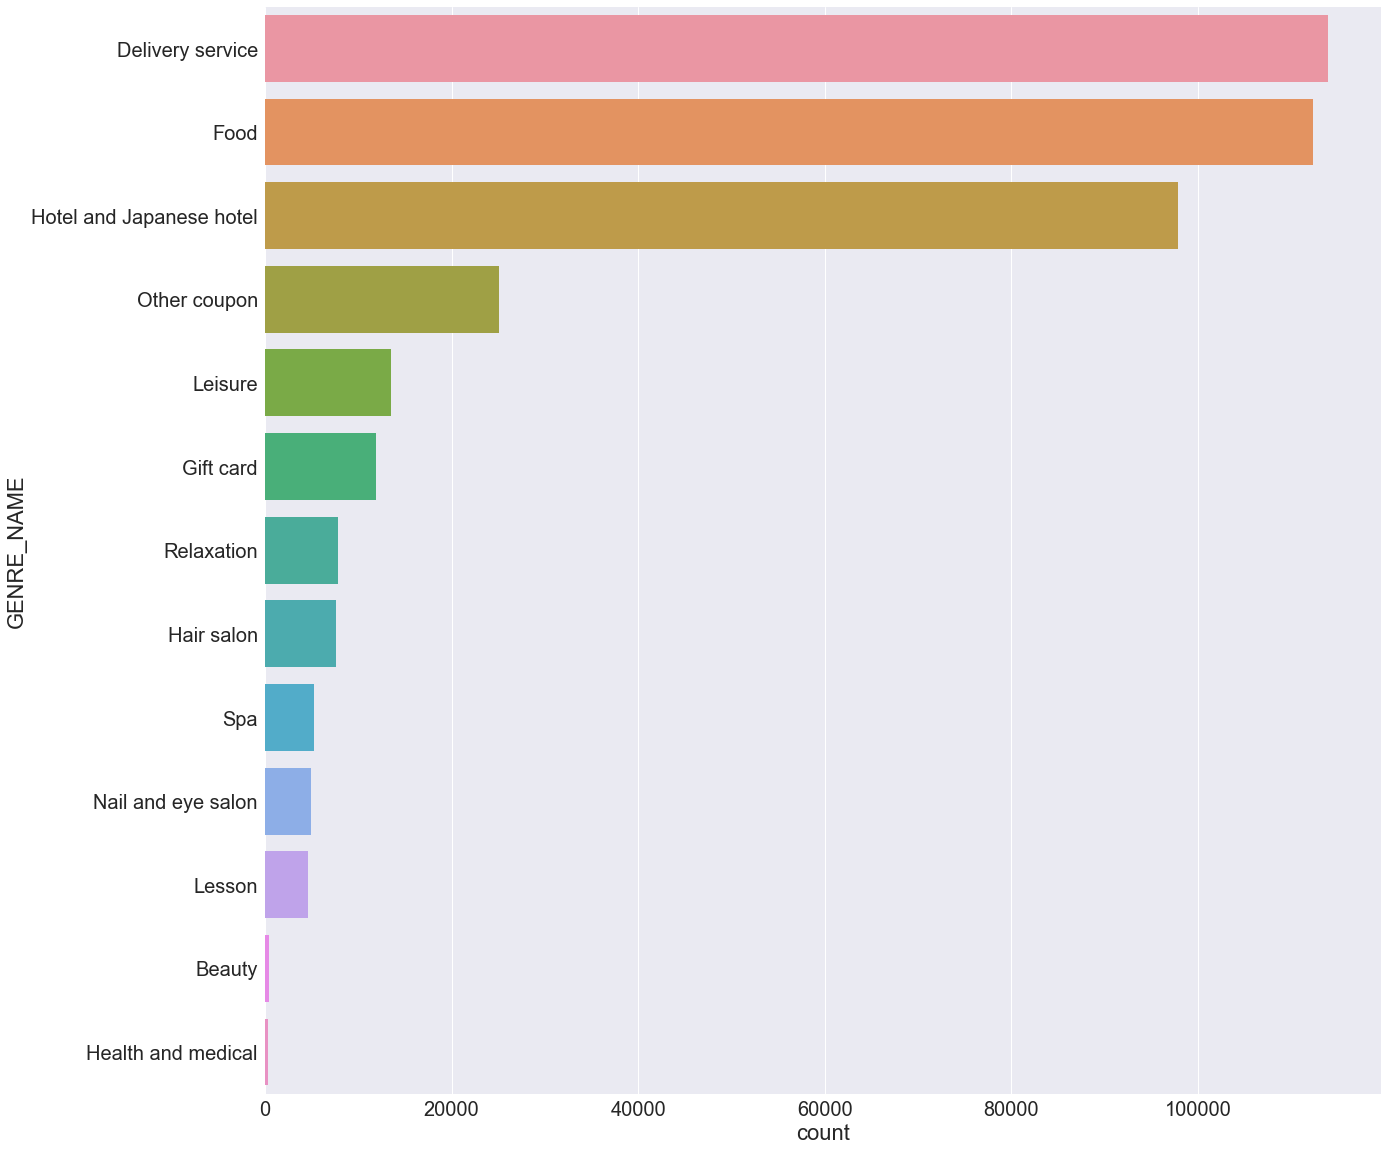

In [21]:
sns.set(font_scale=2)
plt.figure(figsize=(20, 20))
sns.countplot(y='GENRE_NAME', data=merged,order=merged['GENRE_NAME'].value_counts().index)

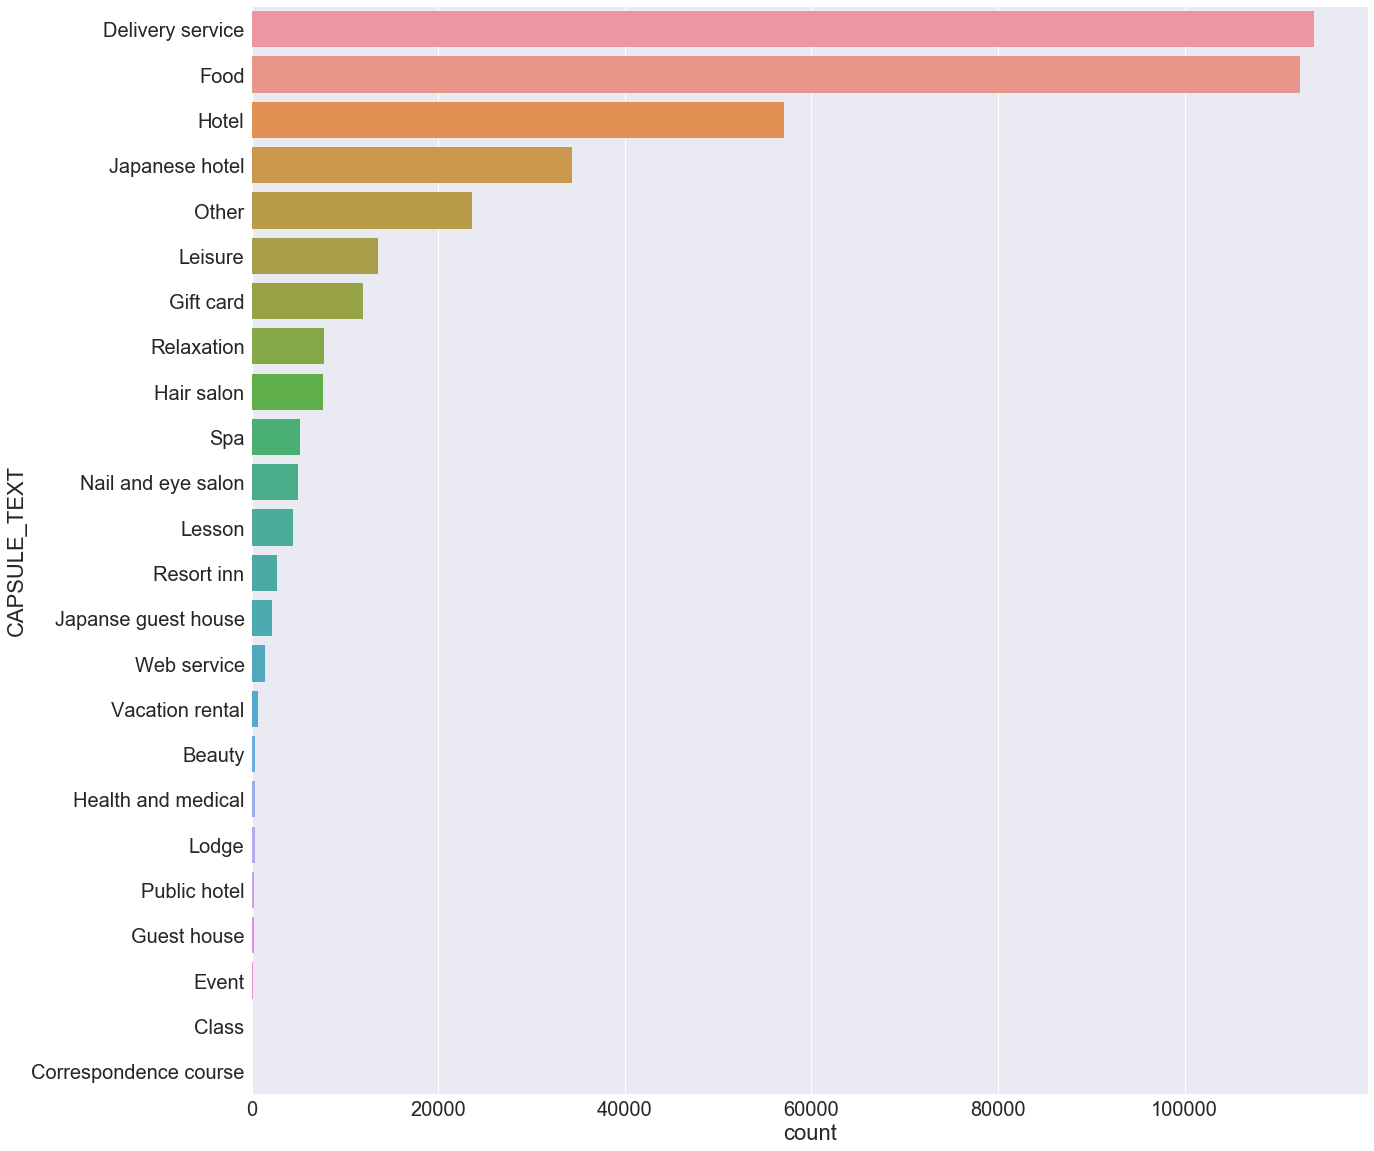

In [22]:
sns.set(font_scale=2)
plt.figure(figsize=(20, 20))
sns.countplot(y='CAPSULE_TEXT', data=merged,order=merged['CAPSULE_TEXT'].value_counts().index)

## 전체 쿠폰 = Delivery -> Food 순
## 오전 11~12시에 조회된 쿠폰 = 순위는 같음
(완전 같진 않지만)

In [27]:
evening = view[(20<=view['I_HOUR']) & (view['I_HOUR']<=23)]

In [28]:
len(evening)

761796

In [29]:
merged = pd.merge(morning, coupon, left_on='VIEW_COUPON_ID_hash', right_on='COUPON_ID_hash')

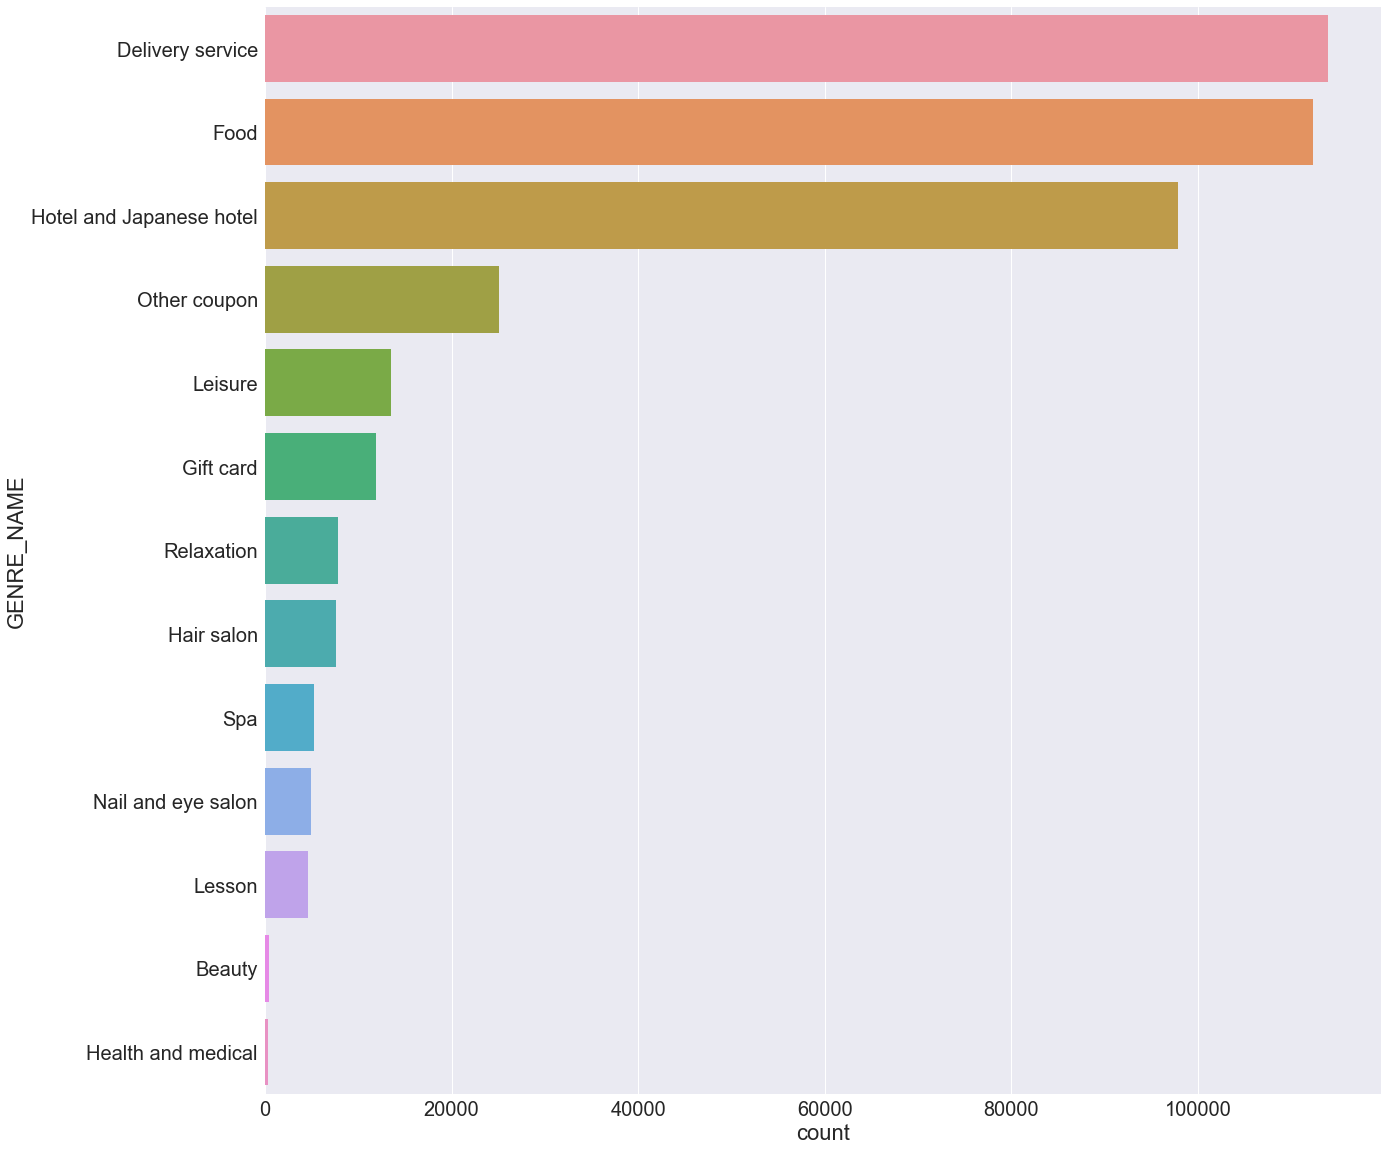

In [30]:
sns.set(font_scale=2)
plt.figure(figsize=(20, 20))
sns.countplot(y='GENRE_NAME', data=merged,order=merged['GENRE_NAME'].value_counts().index)

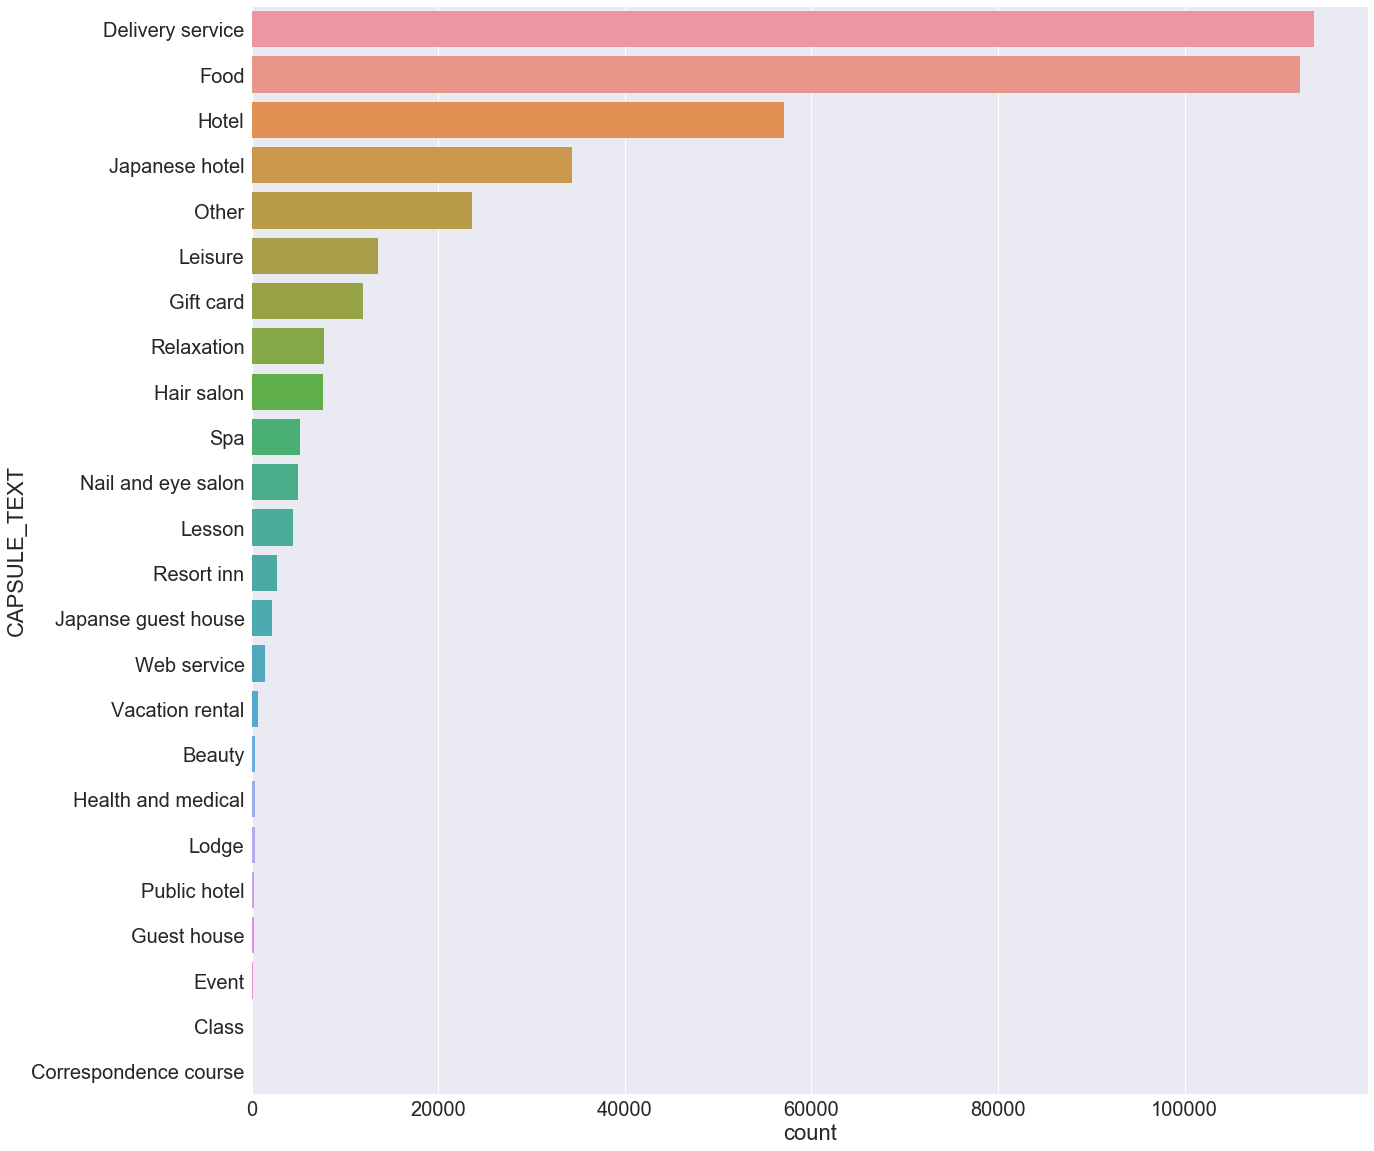

In [31]:
sns.set(font_scale=2)
plt.figure(figsize=(20, 20))
sns.countplot(y='CAPSULE_TEXT', data=merged,order=merged['CAPSULE_TEXT'].value_counts().index)

# 저녁시간대에 조회한 쿠폰도 앞과 같다

-----------

# 2. 제일 많이 구매하는 시간대에서 사는 쿠폰종류 + 갯수

In [25]:
detail = g.purchase()
detail["I_DATE"] = pd.to_datetime(detail["I_DATE"]) 
detail["I_YEAR"] = detail["I_DATE"].dt.year 
detail["I_MONTH"] = detail["I_DATE"].dt.month 
detail["I_HOUR"] = detail["I_DATE"].dt.hour
detail["I_WEEKDAY"] = detail["I_DATE"].dt.weekday

In [40]:
detail.head()

,ITEM_COUNT,I_DATE,SMALL_AREA_NAME,PURCHASEID_hash,USER_ID_hash,COUPON_ID_hash,I_YEAR,I_MONTH,I_HOUR,I_WEEKDAY
0,1,2012-03-28 15:06:06,Hyogo,c820a8882374a4e472f0984a8825893f,d9dca3cb44bab12ba313eaa681f663eb,34c48f84026e08355dc3bd19b427f09a,2012,3,15,2
1,1,2011-07-04 23:52:54,"Ginza Shinbashi, Tokyo, Ueno",1b4eb2435421ede98c8931c42e8220ec,560574a339f1b25e57b0221e486907ed,767673b7a777854a92b73b0934ddfae7,2011,7,23,0
2,1,2011-07-16 00:52:49,"Ebisu, Meguro Shinagawa",36b5f9ba46c44b65587d0b16f2e4c77f,560574a339f1b25e57b0221e486907ed,4f3b5b91d9831192557c056022fdc1f2,2011,7,0,5
3,1,2011-07-16 00:54:53,"Ebisu, Meguro Shinagawa",2f30f46937cc9004774e576914b2aa1a,560574a339f1b25e57b0221e486907ed,4f3b5b91d9831192557c056022fdc1f2,2011,7,0,5
4,1,2011-07-16 00:55:52,"Ebisu, Meguro Shinagawa",4d000c64a55ac573d0ae1a8f03677f50,560574a339f1b25e57b0221e486907ed,4f3b5b91d9831192557c056022fdc1f2,2011,7,0,5


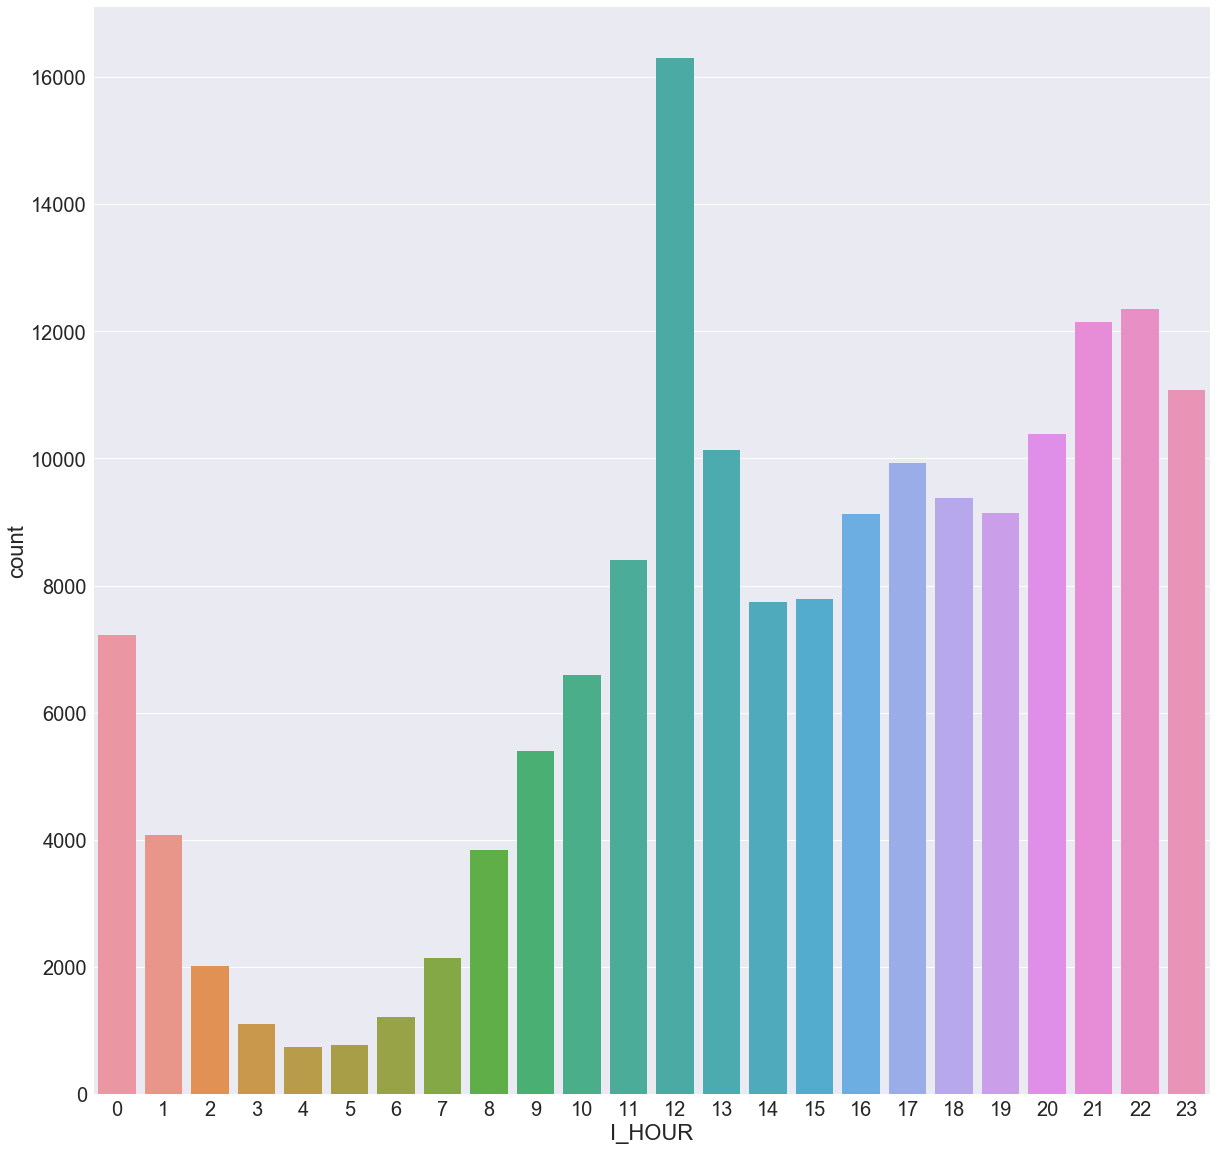

In [26]:
sns.set(font_scale=2)
plt.figure(figsize=(20, 20))
sns.countplot('I_HOUR',data=detail)

In [43]:
lunch = detail[detail['I_HOUR']==12]

In [44]:
len(lunch)

16298

In [47]:
merged = pd.merge(lunch, coupon, left_on='COUPON_ID_hash', right_on='COUPON_ID_hash')

In [48]:
len(merged)

16298

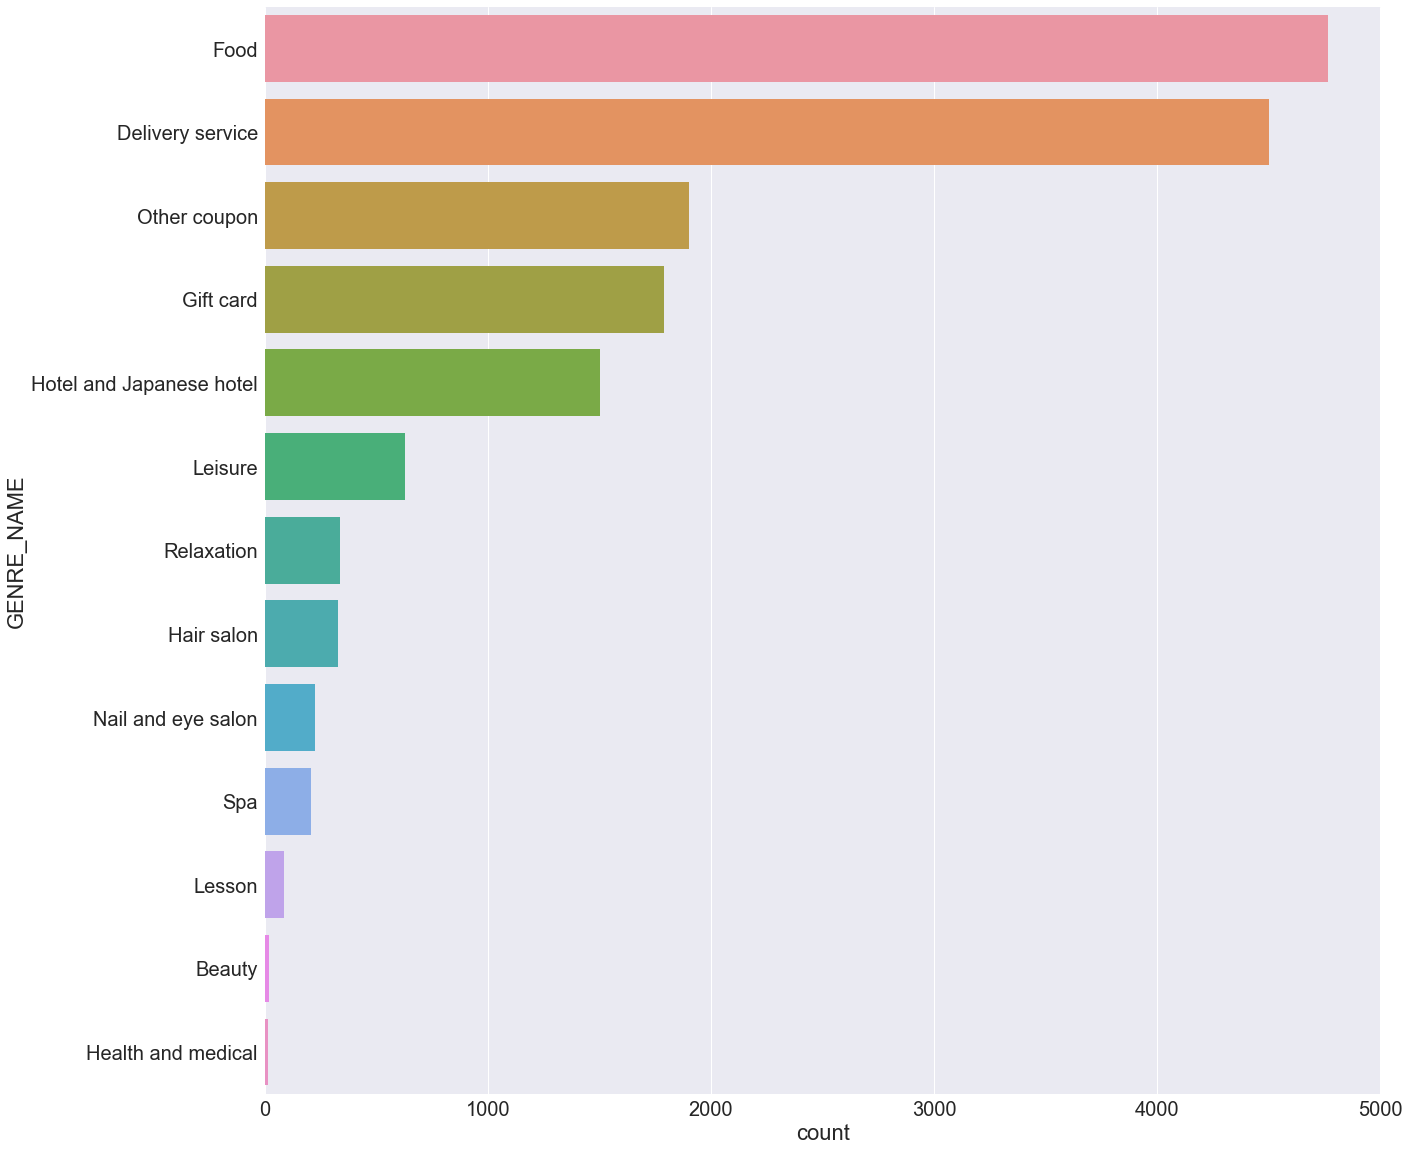

In [49]:
sns.set(font_scale=2)
plt.figure(figsize=(20, 20))
sns.countplot(y='GENRE_NAME', data=merged,order=merged['GENRE_NAME'].value_counts().index)

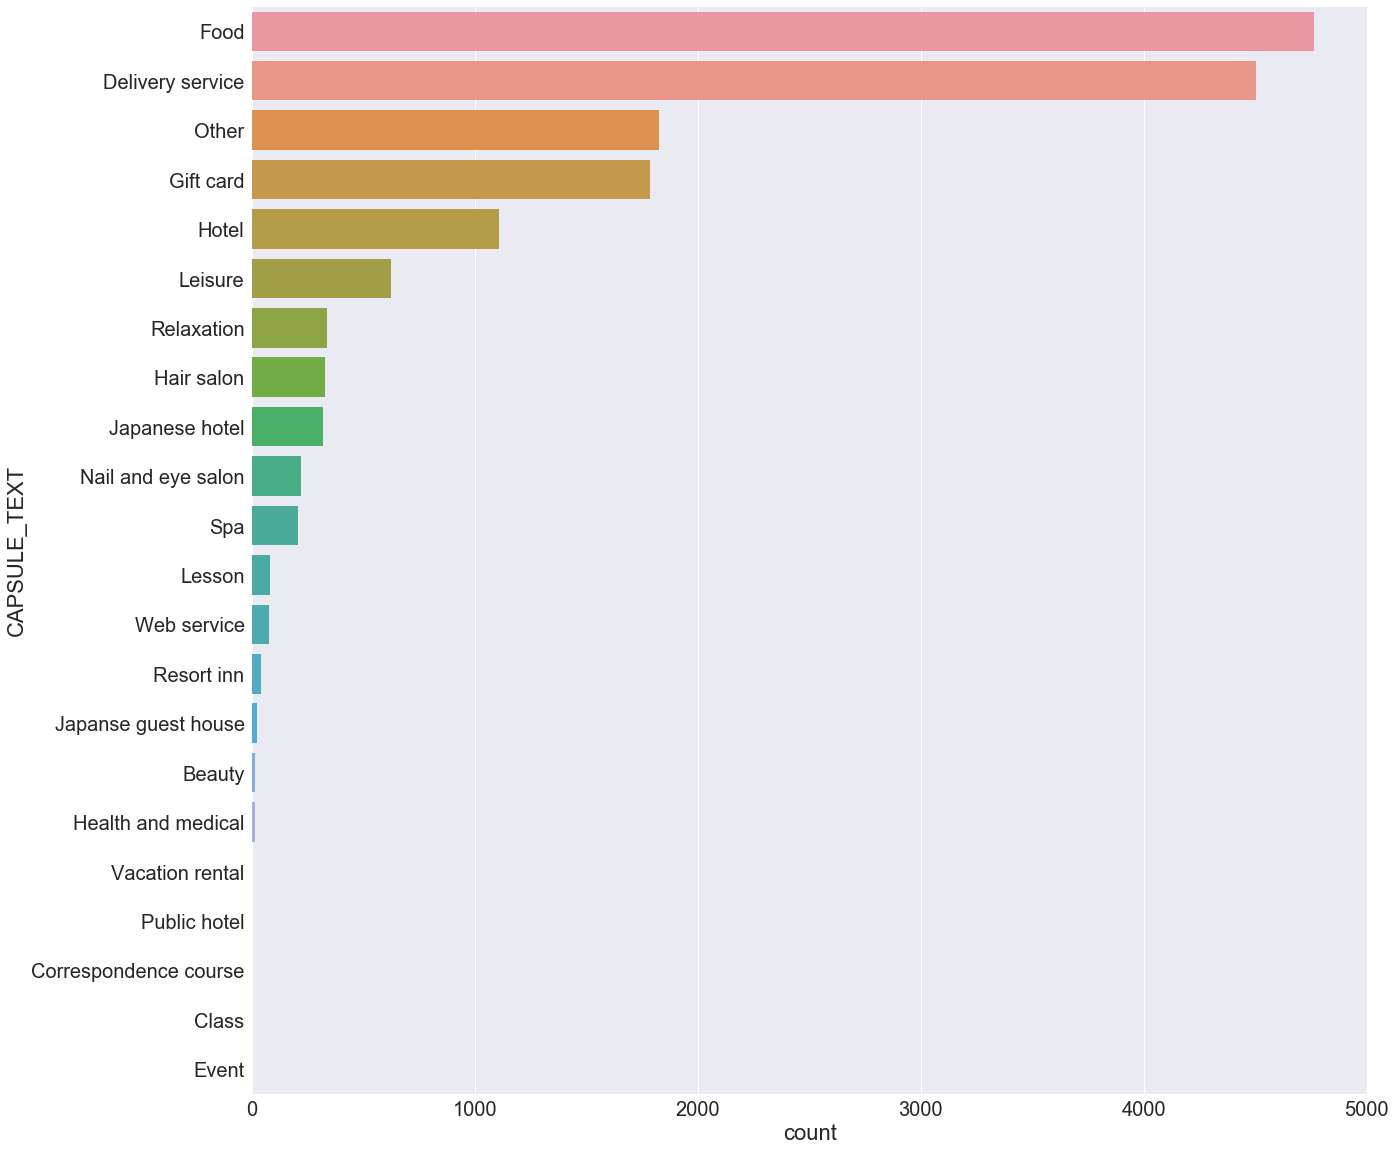

In [50]:
sns.set(font_scale=2)
plt.figure(figsize=(20, 20))
sns.countplot(y='CAPSULE_TEXT', data=merged,order=merged['CAPSULE_TEXT'].value_counts().index)

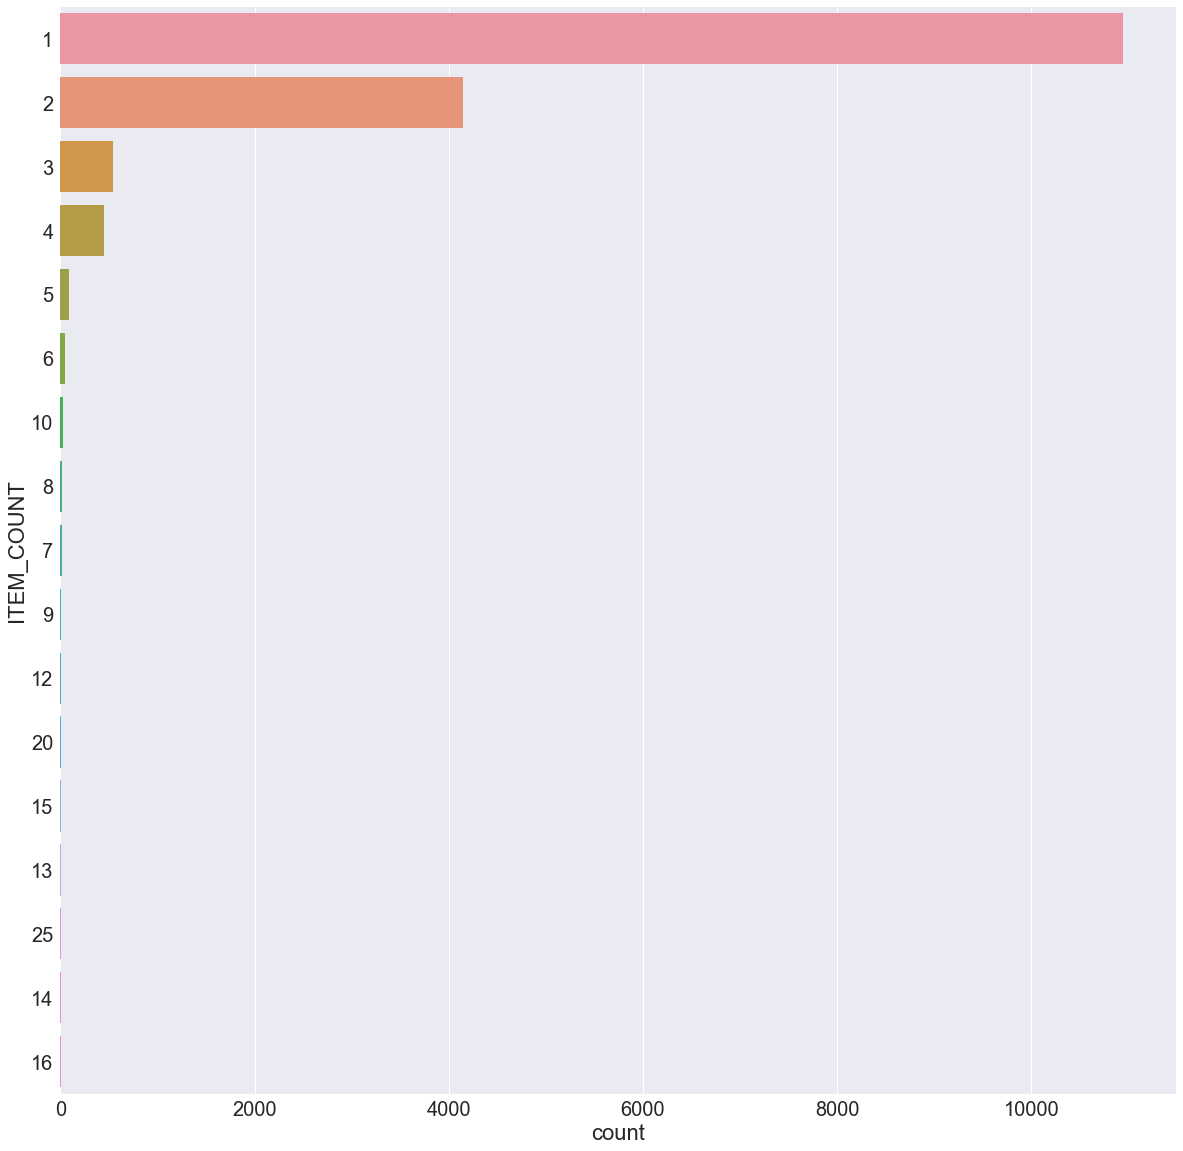

In [52]:
sns.set(font_scale=2)
plt.figure(figsize=(20, 20))
sns.countplot(y='ITEM_COUNT', data=merged,order=merged['ITEM_COUNT'].value_counts().index)

# 원래의 detail 결과와 일치. 1~2개가 제일 많다

# 1. 취급하는 전체 쿠폰 = Delivery -> Food
# 2. 많이 조회한 쿠폰 = Delivery -> Food
# 3. 많이 구매한 쿠폰 = Food -> Delivery

-----------------

# 3. 고객이 제일 많은 지역에서 조회한, 구매한 쿠폰 종류

In [53]:
uvc = g.user_view_coupon_pref()

In [54]:
len(uvc)

2517206

In [55]:
uvc.head()

,REG_DATE,SEX_ID,AGE,WITHDRAW_DATE,PREF_NAME_x,USER_ID_hash,PURCHASE_FLG,I_DATE,PAGE_SERIAL,REFERRER_hash,...,USABLE_DATE_HOLIDAY,USABLE_DATE_BEFORE_HOLIDAY,large_area_name,ken_name,small_area_name,COUPON_ID_hash,PREF_NAME_y,PREFECTUAL_OFFICE,LATITUDE,LONGITUDE
0,2012-03-28 14:14:18,f,25,NaN,NaN,d9dca3cb44bab12ba313eaa681f663eb,0,2012-03-28 14:15:00,7,7d3892e54acb559ae36c459978489330,...,NaN,NaN,Kanto,Tokyo,"Shinjuku, Takadanobaba Nakano - Kichijoji",34c48f84026e08355dc3bd19b427f09a,Tokyo,Shinjuku,35.689521,139.691704
1,2012-03-28 14:14:18,f,25,NaN,NaN,d9dca3cb44bab12ba313eaa681f663eb,0,2012-03-28 14:17:28,9,7d3892e54acb559ae36c459978489330,...,NaN,NaN,Kanto,Tokyo,"Shinjuku, Takadanobaba Nakano - Kichijoji",34c48f84026e08355dc3bd19b427f09a,Tokyo,Shinjuku,35.689521,139.691704
2,2012-03-28 14:14:18,f,25,NaN,NaN,d9dca3cb44bab12ba313eaa681f663eb,0,2012-03-28 14:32:02,25,7d3892e54acb559ae36c459978489330,...,NaN,NaN,Kanto,Tokyo,"Shinjuku, Takadanobaba Nakano - Kichijoji",34c48f84026e08355dc3bd19b427f09a,Tokyo,Shinjuku,35.689521,139.691704
3,2012-03-28 14:14:18,f,25,NaN,NaN,d9dca3cb44bab12ba313eaa681f663eb,1,2012-03-28 15:06:11,45,878034ded0ee2297d7ce27c5169e8584,...,NaN,NaN,Kanto,Tokyo,"Shinjuku, Takadanobaba Nakano - Kichijoji",34c48f84026e08355dc3bd19b427f09a,Tokyo,Shinjuku,35.689521,139.691704
4,2012-03-28 14:14:18,f,25,NaN,NaN,d9dca3cb44bab12ba313eaa681f663eb,0,2012-03-28 15:08:10,53,7d3892e54acb559ae36c459978489330,...,NaN,NaN,Kanto,Tokyo,"Shinjuku, Takadanobaba Nakano - Kichijoji",34c48f84026e08355dc3bd19b427f09a,Tokyo,Shinjuku,35.689521,139.691704


In [57]:
most = uvc[(uvc['large_area_name']=='Kanto') | (uvc['large_area_name']=='Kansai')]

In [59]:
len(most)

1816714

# 고객이 제일 많은 지역은 칸토, 칸사이

In [70]:
most.head()

,REG_DATE,SEX_ID,AGE,WITHDRAW_DATE,PREF_NAME_x,USER_ID_hash,PURCHASE_FLG,I_DATE,PAGE_SERIAL,REFERRER_hash,...,USABLE_DATE_HOLIDAY,USABLE_DATE_BEFORE_HOLIDAY,large_area_name,ken_name,small_area_name,COUPON_ID_hash,PREF_NAME_y,PREFECTUAL_OFFICE,LATITUDE,LONGITUDE
0,2012-03-28 14:14:18,f,25,NaN,NaN,d9dca3cb44bab12ba313eaa681f663eb,0,2012-03-28 14:15:00,7,7d3892e54acb559ae36c459978489330,...,NaN,NaN,Kanto,Tokyo,"Shinjuku, Takadanobaba Nakano - Kichijoji",34c48f84026e08355dc3bd19b427f09a,Tokyo,Shinjuku,35.689521,139.691704
1,2012-03-28 14:14:18,f,25,NaN,NaN,d9dca3cb44bab12ba313eaa681f663eb,0,2012-03-28 14:17:28,9,7d3892e54acb559ae36c459978489330,...,NaN,NaN,Kanto,Tokyo,"Shinjuku, Takadanobaba Nakano - Kichijoji",34c48f84026e08355dc3bd19b427f09a,Tokyo,Shinjuku,35.689521,139.691704
2,2012-03-28 14:14:18,f,25,NaN,NaN,d9dca3cb44bab12ba313eaa681f663eb,0,2012-03-28 14:32:02,25,7d3892e54acb559ae36c459978489330,...,NaN,NaN,Kanto,Tokyo,"Shinjuku, Takadanobaba Nakano - Kichijoji",34c48f84026e08355dc3bd19b427f09a,Tokyo,Shinjuku,35.689521,139.691704
3,2012-03-28 14:14:18,f,25,NaN,NaN,d9dca3cb44bab12ba313eaa681f663eb,1,2012-03-28 15:06:11,45,878034ded0ee2297d7ce27c5169e8584,...,NaN,NaN,Kanto,Tokyo,"Shinjuku, Takadanobaba Nakano - Kichijoji",34c48f84026e08355dc3bd19b427f09a,Tokyo,Shinjuku,35.689521,139.691704
4,2012-03-28 14:14:18,f,25,NaN,NaN,d9dca3cb44bab12ba313eaa681f663eb,0,2012-03-28 15:08:10,53,7d3892e54acb559ae36c459978489330,...,NaN,NaN,Kanto,Tokyo,"Shinjuku, Takadanobaba Nakano - Kichijoji",34c48f84026e08355dc3bd19b427f09a,Tokyo,Shinjuku,35.689521,139.691704


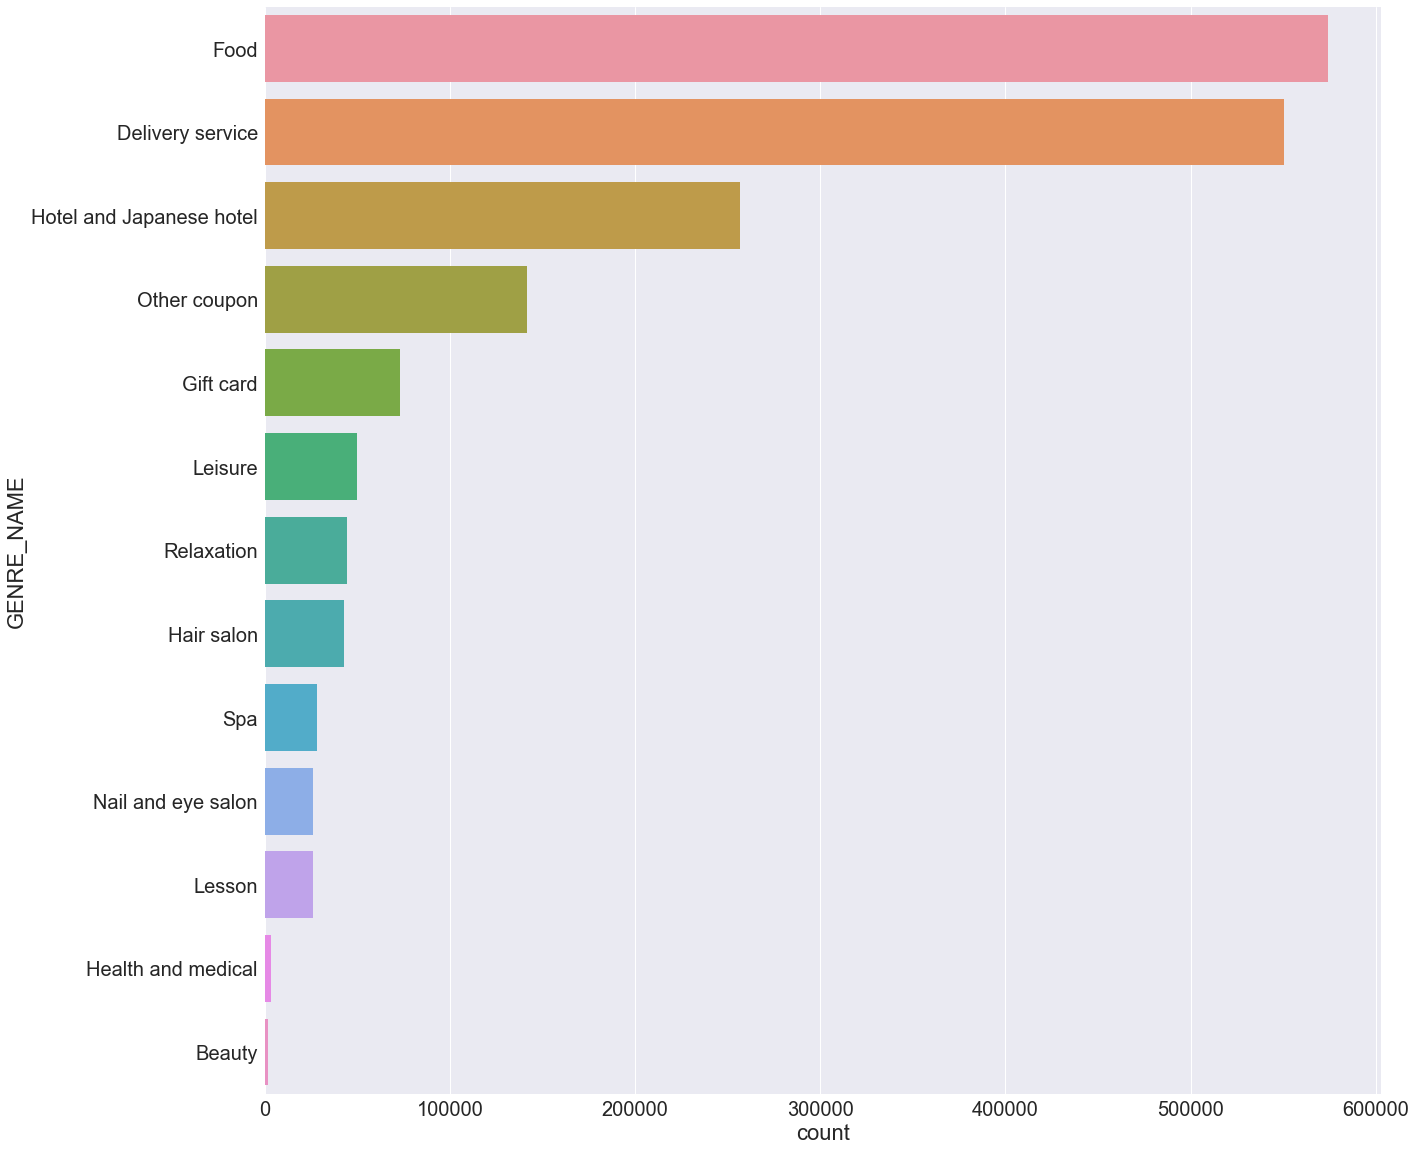

In [71]:
sns.set(font_scale=2)
plt.figure(figsize=(20, 20))
sns.countplot(y='GENRE_NAME', data=most,order=most['GENRE_NAME'].value_counts().index)

In [72]:
upc = g.user_purchase_coupon_pref()

In [73]:
len(upc)

168996

In [75]:
most = upc[(upc['large_area_name']=='Kanto') | (upc['large_area_name']=='Kansai')]

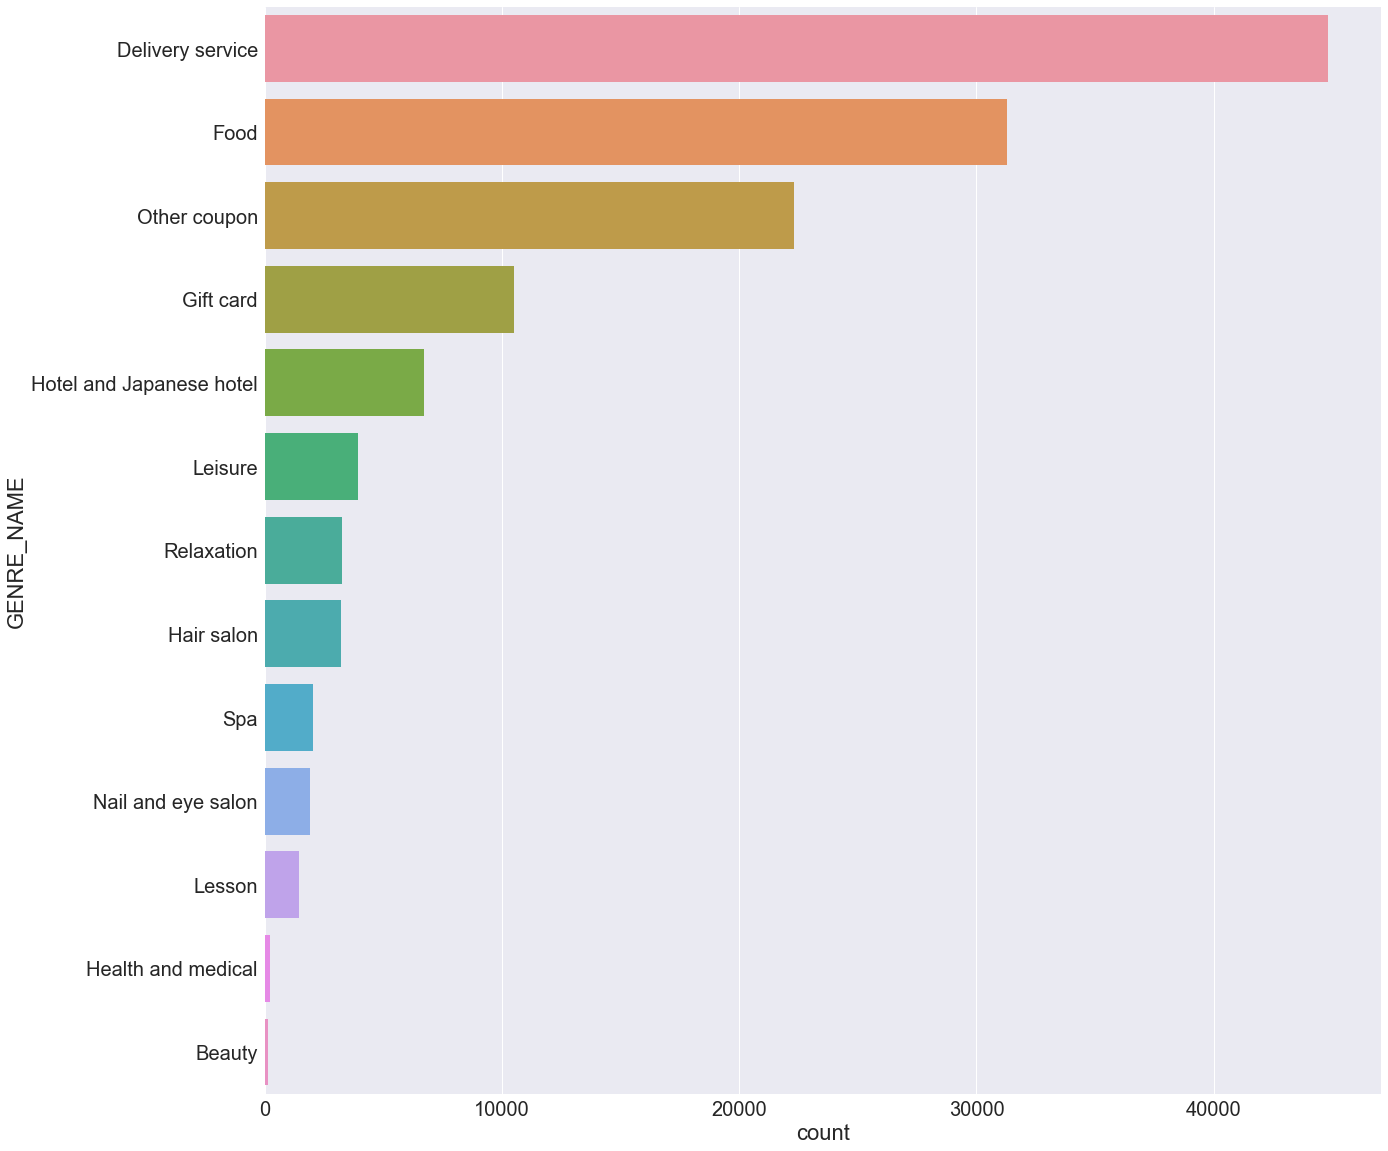

In [76]:
sns.set(font_scale=2)
plt.figure(figsize=(20, 20))
sns.countplot(y='GENRE_NAME', data=most,order=most['GENRE_NAME'].value_counts().index)

# 고객이 많은 지역에서 조회한 쿠폰은 원래와 크게 다르지 않지만
# 구매한 쿠폰에서 원래 3위인 Hotel쿠폰이 5위로 떨어짐

-----------------------

# 4. 홈페이지에서 쿠폰을 보고 사는데까지 시간이 얼마나 걸리나

## view X purchase하면 조회시간, 구매시간이 같이 확인가능

In [94]:
view.rename(columns={'I_DATE':'VIEW_DATE'}, inplace=True)
detail.rename(columns={'I_DATE':'PURCHASE_DATE'}, inplace=True)
view = view[view['PURCHASE_FLG']==1]

In [95]:
vp = pd.merge(view, detail, left_on=['VIEW_COUPON_ID_hash','PURCHASEID_hash','USER_ID_hash'],right_on=['COUPON_ID_hash','PURCHASEID_hash','USER_ID_hash'])

In [96]:
vp

,PURCHASE_FLG,VIEW_DATE,PAGE_SERIAL,REFERRER_hash,VIEW_COUPON_ID_hash,USER_ID_hash,SESSION_ID_hash,PURCHASEID_hash,I_YEAR_x,I_MONTH_x,I_HOUR_x,I_WEEKDAY_x,ITEM_COUNT,PURCHASE_DATE,SMALL_AREA_NAME,COUPON_ID_hash,I_YEAR_y,I_MONTH_y,I_HOUR_y,I_WEEKDAY_y
0,1,2012-03-28 15:06:11,45,878034ded0ee2297d7ce27c5169e8584,34c48f84026e08355dc3bd19b427f09a,d9dca3cb44bab12ba313eaa681f663eb,673af822615593249e7c6a9a1a6bbb1a,c820a8882374a4e472f0984a8825893f,2012,3,15,2,1,2012-03-28 15:06:06,Hyogo,34c48f84026e08355dc3bd19b427f09a,2012,3,15,2
1,1,2012-01-15 20:54:04,18,6c5616ced18d79fa5a97c5c8f3e65f8f,3e7d148d632f7ee123504e37d3ee9c66,560574a339f1b25e57b0221e486907ed,5667017ad3ef436680e9b2132de464f1,231e87e928a48403a92783780010aef9,2012,1,20,6,2,2012-01-15 20:53:59,"Shibuya, Aoyama, Jiyugaoka",3e7d148d632f7ee123504e37d3ee9c66,2012,1,20,6
2,1,2012-03-13 00:29:25,12,6c5616ced18d79fa5a97c5c8f3e65f8f,34ea3cc1cf4ec57f3547c5fcd4de3abe,560574a339f1b25e57b0221e486907ed,47cf01d9620c1ae51b84763ebde26977,6f0b1da67d70392cbd8fb40740371a76,2012,3,0,1,2,2012-03-13 00:29:18,"Ginza Shinbashi, Tokyo, Ueno",34ea3cc1cf4ec57f3547c5fcd4de3abe,2012,3,0,1
3,1,2012-03-31 01:31:17,9,6c5616ced18d79fa5a97c5c8f3e65f8f,129a696dac8e7eb0903f02ae217c636e,560574a339f1b25e57b0221e486907ed,d34b2bc9c0466b4d975adc3a803d1b64,c80173987b3515b63b90617aad48a4d3,2012,3,1,5,1,2012-03-31 01:31:08,"Shibuya, Aoyama, Jiyugaoka",129a696dac8e7eb0903f02ae217c636e,2012,3,1,5
4,1,2012-04-05 09:21:29,9,6c5616ced18d79fa5a97c5c8f3e65f8f,716abc8dcbfee15cf79e7c25c77a2456,560574a339f1b25e57b0221e486907ed,9ec56c4c913d890c58bdb480be42291c,d3ce3a8259e6755971616fb853e2f23a,2012,4,9,3,1,2012-04-05 09:21:21,"Shinjuku, Takadanobaba Nakano - Kichijoji",716abc8dcbfee15cf79e7c25c77a2456,2012,4,9,3
5,1,2012-05-04 10:30:30,11,6c5616ced18d79fa5a97c5c8f3e65f8f,cea20b04d7bb26b521db4f3803737af4,560574a339f1b25e57b0221e486907ed,9a8aae1dda5f0c3a2fb92f7b724a97d6,ad5fcf63d2793315c46d9a5dd624f233,2012,5,10,4,1,2012-05-04 10:30:23,"Ebisu, Meguro Shinagawa",cea20b04d7bb26b521db4f3803737af4,2012,5,10,4
6,1,2012-05-04 10:32:23,14,6c5616ced18d79fa5a97c5c8f3e65f8f,cea20b04d7bb26b521db4f3803737af4,560574a339f1b25e57b0221e486907ed,9a8aae1dda5f0c3a2fb92f7b724a97d6,ad5fcf63d2793315c46d9a5dd624f233,2012,5,10,4,1,2012-05-04 10:30:23,"Ebisu, Meguro Shinagawa",cea20b04d7bb26b521db4f3803737af4,2012,5,10,4
7,1,2012-05-17 20:56:37,11,6c5616ced18d79fa5a97c5c8f3e65f8f,d0590f9b80fd6aa59a31808a41dfd00c,560574a339f1b25e57b0221e486907ed,583265389756873259313d46ad3f98f9,b3606c6ad14c7771a80613f721aa05a3,2012,5,20,3,1,2012-05-17 20:56:09,"Shinjuku, Takadanobaba Nakano - Kichijoji",d0590f9b80fd6aa59a31808a41dfd00c,2012,5,20,3
8,1,2012-06-12 22:51:06,11,6c5616ced18d79fa5a97c5c8f3e65f8f,4b4a03629482c17c3b83b46c2704a1d1,560574a339f1b25e57b0221e486907ed,591fc83bf5f5021297599e70011f69cf,d5f196b588dd5dc4b2f4611d7eb17a23,2012,6,22,1,1,2012-06-12 22:50:48,Gunma,4b4a03629482c17c3b83b46c2704a1d1,2012,6,22,1
9,1,2011-07-04 23:53:21,12,6c5616ced18d79fa5a97c5c8f3e65f8f,767673b7a777854a92b73b0934ddfae7,560574a339f1b25e57b0221e486907ed,4c07d369aa6fa20f51e79bfe293e17d8,1b4eb2435421ede98c8931c42e8220ec,2011,7,23,0,1,2011-07-04 23:52:54,"Ginza Shinbashi, Tokyo, Ueno",767673b7a777854a92b73b0934ddfae7,2011,7,23,0


In [110]:
tmp = vp.loc[:,['VIEW_DATE','PURCHASE_DATE']]

In [111]:
tmp

,VIEW_DATE,PURCHASE_DATE
0,2012-03-28 15:06:11,2012-03-28 15:06:06
1,2012-01-15 20:54:04,2012-01-15 20:53:59
2,2012-03-13 00:29:25,2012-03-13 00:29:18
3,2012-03-31 01:31:17,2012-03-31 01:31:08
4,2012-04-05 09:21:29,2012-04-05 09:21:21
5,2012-05-04 10:30:30,2012-05-04 10:30:23
6,2012-05-04 10:32:23,2012-05-04 10:30:23
7,2012-05-17 20:56:37,2012-05-17 20:56:09
8,2012-06-12 22:51:06,2012-06-12 22:50:48
9,2011-07-04 23:53:21,2011-07-04 23:52:54


In [112]:
len(tmp[tmp['VIEW_DATE'] > tmp['PURCHASE_DATE']])

122110

In [113]:
len(tmp[tmp['VIEW_DATE'] == tmp['PURCHASE_DATE']])

276

In [114]:
len(tmp[tmp['VIEW_DATE'] < tmp['PURCHASE_DATE']])

3

In [119]:
tmp['VIEW_DATE'] - tmp['PURCHASE_DATE']

0        00:00:05
1        00:00:05
2        00:00:07
3        00:00:09
4        00:00:08
5        00:00:07
6        00:02:00
7        00:00:28
8        00:00:18
9        00:00:27
10       00:00:07
11       00:00:03
12       00:00:05
13       00:00:02
14       00:00:01
15       00:00:06
16       00:00:03
17       00:00:05
18       00:00:03
19       00:00:03
20       00:00:06
21       00:00:05
22       00:00:03
23       00:00:02
24       00:00:02
25       00:00:03
26       00:00:03
27       00:00:02
28       00:00:01
29       00:00:02
           ...   
122359   00:00:04
122360   00:00:04
122361   00:00:04
122362   00:00:05
122363   00:41:54
122364   00:00:04
122365   00:00:07
122366   00:00:05
122367   00:00:01
122368   00:00:02
122369   00:00:09
122370   00:00:03
122371   00:00:03
122372   00:00:06
122373   00:00:04
122374   00:00:08
122375   00:00:01
122376   00:00:02
122377   00:00:01
122378   00:00:02
122379   00:00:01
122380   00:00:01
122381   00:00:01
122382   00:00:01
122383   0

# view_date가 purchase_date보다 빠른건 뭘 의미할까
# 일단 질러놓고 본다?
# 아니면 view와 purchase를 잘못 해석하고 있거나
# 아니면 디비저장 시 시스템오류로 잘못 들어갔거나

# 하지만 시간차이가 그렇게 크지 않기 때문에
# view_date, purchase_date 둘 중 하나로 의사결정해도
# 큰 문제는 없을 듯

In [115]:
coupon = g.coupon()
coupon

,CAPSULE_TEXT,GENRE_NAME,PRICE_RATE,CATALOG_PRICE,DISCOUNT_PRICE,DISPFROM,DISPEND,DISPPERIOD,VALIDFROM,VALIDEND,...,USABLE_DATE_THU,USABLE_DATE_FRI,USABLE_DATE_SAT,USABLE_DATE_SUN,USABLE_DATE_HOLIDAY,USABLE_DATE_BEFORE_HOLIDAY,large_area_name,ken_name,small_area_name,COUPON_ID_hash
0,Food,Food,50,3000,1500,2011-07-08 12:00:00,2011-07-09 12:00:00,1,2011-07-10,2011-12-08,...,1.0,0.0,0.0,1.0,1.0,0.0,Kanto,Saitama Prefecture,Saitama,6b263844241eea98c5a97f1335ea82af
1,Food,Food,51,2080,1000,2011-07-01 12:00:00,2011-07-02 12:00:00,1,2011-07-03,2011-12-04,...,1.0,1.0,1.0,1.0,1.0,1.0,Kanto,Chiba Prefecture,Chiba,cc031f250e8bad1e24060263b9fc0ddd
2,Food,Food,50,7000,3500,2011-07-12 12:00:00,2011-07-15 12:00:00,3,2011-07-16,2012-01-11,...,1.0,1.0,1.0,1.0,1.0,1.0,Kanto,Chiba Prefecture,Chiba,ba5e9b7453ca52ff711635a5d2e8102d
3,Food,Food,50,3000,1500,2011-07-09 12:00:00,2011-07-11 12:00:00,2,2011-07-12,2011-12-01,...,1.0,0.0,0.0,1.0,1.0,1.0,Kanto,Chiba Prefecture,Chiba,3e1ffbedca3569f9e8032d401e8cb4e6
4,Food,Food,50,2000,1000,2011-07-05 12:00:00,2011-07-06 12:00:00,1,2011-07-07,2011-12-30,...,1.0,0.0,0.0,1.0,1.0,0.0,Kanto,Chiba Prefecture,Chiba,782934b6c815b4030ea204eef7d4a734
5,Food,Food,50,4000,2000,2011-07-24 12:00:00,2011-07-26 12:00:00,2,2011-07-27,2011-10-30,...,1.0,1.0,1.0,1.0,1.0,1.0,Kanto,Chiba Prefecture,Chiba,439db4336f84d4e4a13290fc0d7e6c4e
6,Food,Food,51,3495,1700,2011-09-03 12:00:00,2011-09-05 12:00:00,2,2011-09-07,2012-02-28,...,1.0,1.0,1.0,1.0,1.0,1.0,Kanto,Tokyo,"Shinjuku, Takadanobaba Nakano - Kichijoji",c9144a97ed61cb778414b758c704d828
7,Food,Food,51,3100,1500,2011-08-02 12:00:00,2011-08-04 12:00:00,2,2011-08-05,2012-01-31,...,1.0,1.0,1.0,0.0,1.0,1.0,Kansai,Kyoto,Kyoto,2b00d8dfc1a9fcf58e5014cbfd4a1e48
8,Food,Food,50,3500,1750,2011-08-11 12:00:00,2011-08-13 12:00:00,2,2011-08-14,2011-11-14,...,1.0,1.0,1.0,1.0,1.0,1.0,Kanto,Tokyo,"Ebisu, Meguro Shinagawa",74e3a12659d38ef20378f156cfeaf204
9,Food,Food,57,10500,4500,2011-09-21 12:00:00,2011-09-24 12:00:00,3,2011-09-26,2012-02-29,...,0.0,0.0,1.0,0.0,0.0,1.0,Kanto,Tokyo,"Ginza Shinbashi, Tokyo, Ueno",8a0ab8c5dd5014df8b4860233238ed44


In [118]:
len(coupon['COUPON_ID_hash'].unique())

19413

-------------------------------

# 5. 어떤 쿠폰이 이득이 제일 많이 남나
# 원가, 판매가를 알면 될텐데 원가에 대한 정보가 없음

----------

# 6. 연령대별로 어떤 쿠폰이 잘 팔리나

In [2]:
from ml_config import *
import gen as g

In [4]:
upc = g.user_purchase_coupon_pref()

In [5]:
upc.head()

,REG_DATE,SEX_ID,AGE,WITHDRAW_DATE,PREF_NAME_x,USER_ID_hash,ITEM_COUNT,I_DATE,SMALL_AREA_NAME,PURCHASEID_hash,...,USABLE_DATE_SUN,USABLE_DATE_HOLIDAY,USABLE_DATE_BEFORE_HOLIDAY,large_area_name,ken_name,small_area_name,PREF_NAME_y,PREFECTUAL_OFFICE,LATITUDE,LONGITUDE
0,2012-03-28 14:14:18,f,25,NaN,NaN,d9dca3cb44bab12ba313eaa681f663eb,1,2012-03-28 15:06:06,Hyogo,c820a8882374a4e472f0984a8825893f,...,NaN,NaN,NaN,Kanto,Tokyo,"Shinjuku, Takadanobaba Nakano - Kichijoji",Tokyo,Shinjuku,35.689521,139.691704
1,2011-06-12 18:38:39,f,49,NaN,Hyogo Prefecture,dd8a79645e8170db6a91bad1d89b4055,1,2012-03-26 23:26:24,Chiba,028ac37f96a17e6be2db51ed0884ac5a,...,NaN,NaN,NaN,Kanto,Tokyo,"Shinjuku, Takadanobaba Nakano - Kichijoji",Tokyo,Shinjuku,35.689521,139.691704
2,2011-07-29 18:02:46,f,25,NaN,NaN,658249379aaaf2b2320061e5218c0c2c,1,2012-03-26 13:50:20,"Shinjuku, Takadanobaba Nakano - Kichijoji",eb7f867c9f1b14c1a2b1cc47004828ae,...,NaN,NaN,NaN,Kanto,Tokyo,"Shinjuku, Takadanobaba Nakano - Kichijoji",Tokyo,Shinjuku,35.689521,139.691704
3,2011-05-24 13:37:54,f,65,NaN,NaN,1c4aad19f033d97dc163b481116de322,1,2012-03-28 22:46:58,Wakayama,fddda2bdaba87fc9b86d97e908152014,...,NaN,NaN,NaN,Kanto,Tokyo,"Shinjuku, Takadanobaba Nakano - Kichijoji",Tokyo,Shinjuku,35.689521,139.691704
4,2012-03-29 14:08:37,f,38,NaN,NaN,e78ae0887c4a9dce91ff0d2a45a9f72c,1,2012-03-29 15:09:51,Miyazaki,6659c8fdb5f66b4013613ff770f91db7,...,NaN,NaN,NaN,Kanto,Tokyo,"Shinjuku, Takadanobaba Nakano - Kichijoji",Tokyo,Shinjuku,35.689521,139.691704


# 20, 30, 40, 50대만 추림

In [6]:
twenty = upc[(20<=upc['AGE']) & (upc['AGE']<=29)]
thirty = upc[(30<=upc['AGE']) & (upc['AGE']<=39)]
forty = upc[(40<=upc['AGE']) & (upc['AGE']<=49)]
fifty = upc[(50<=upc['AGE']) & (upc['AGE']<=59)]

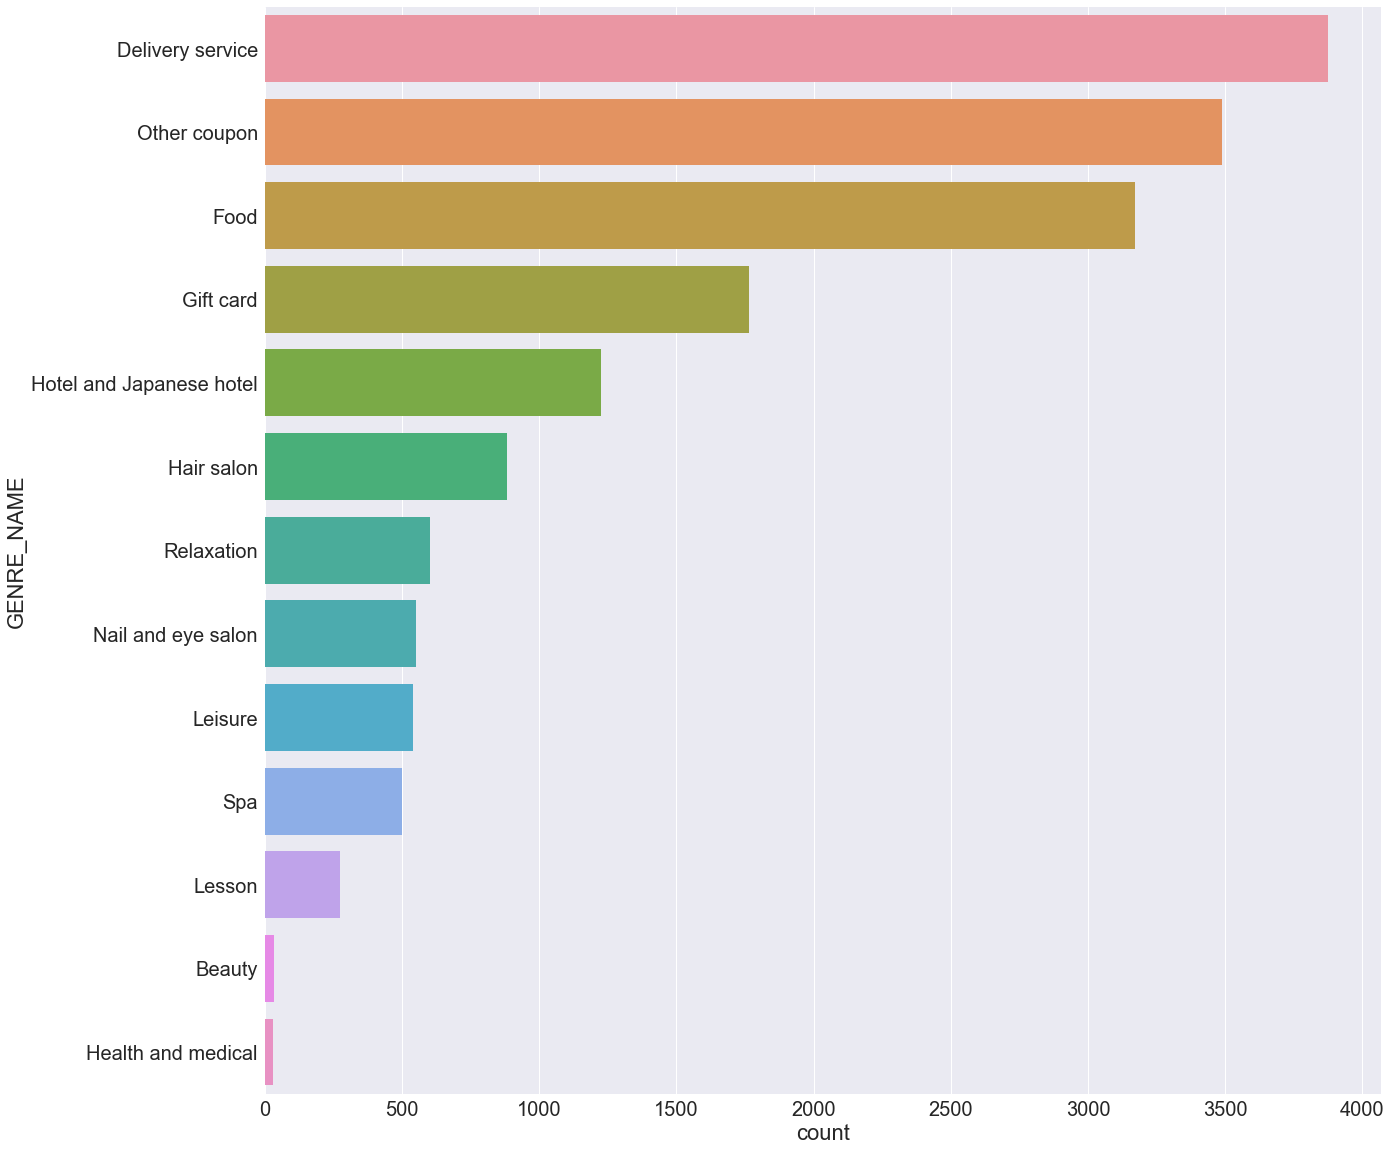

In [7]:
sns.set(font_scale=2)
plt.figure(figsize=(20, 20))
sns.countplot(y='GENRE_NAME', data=twenty,order=twenty['GENRE_NAME'].value_counts().index)

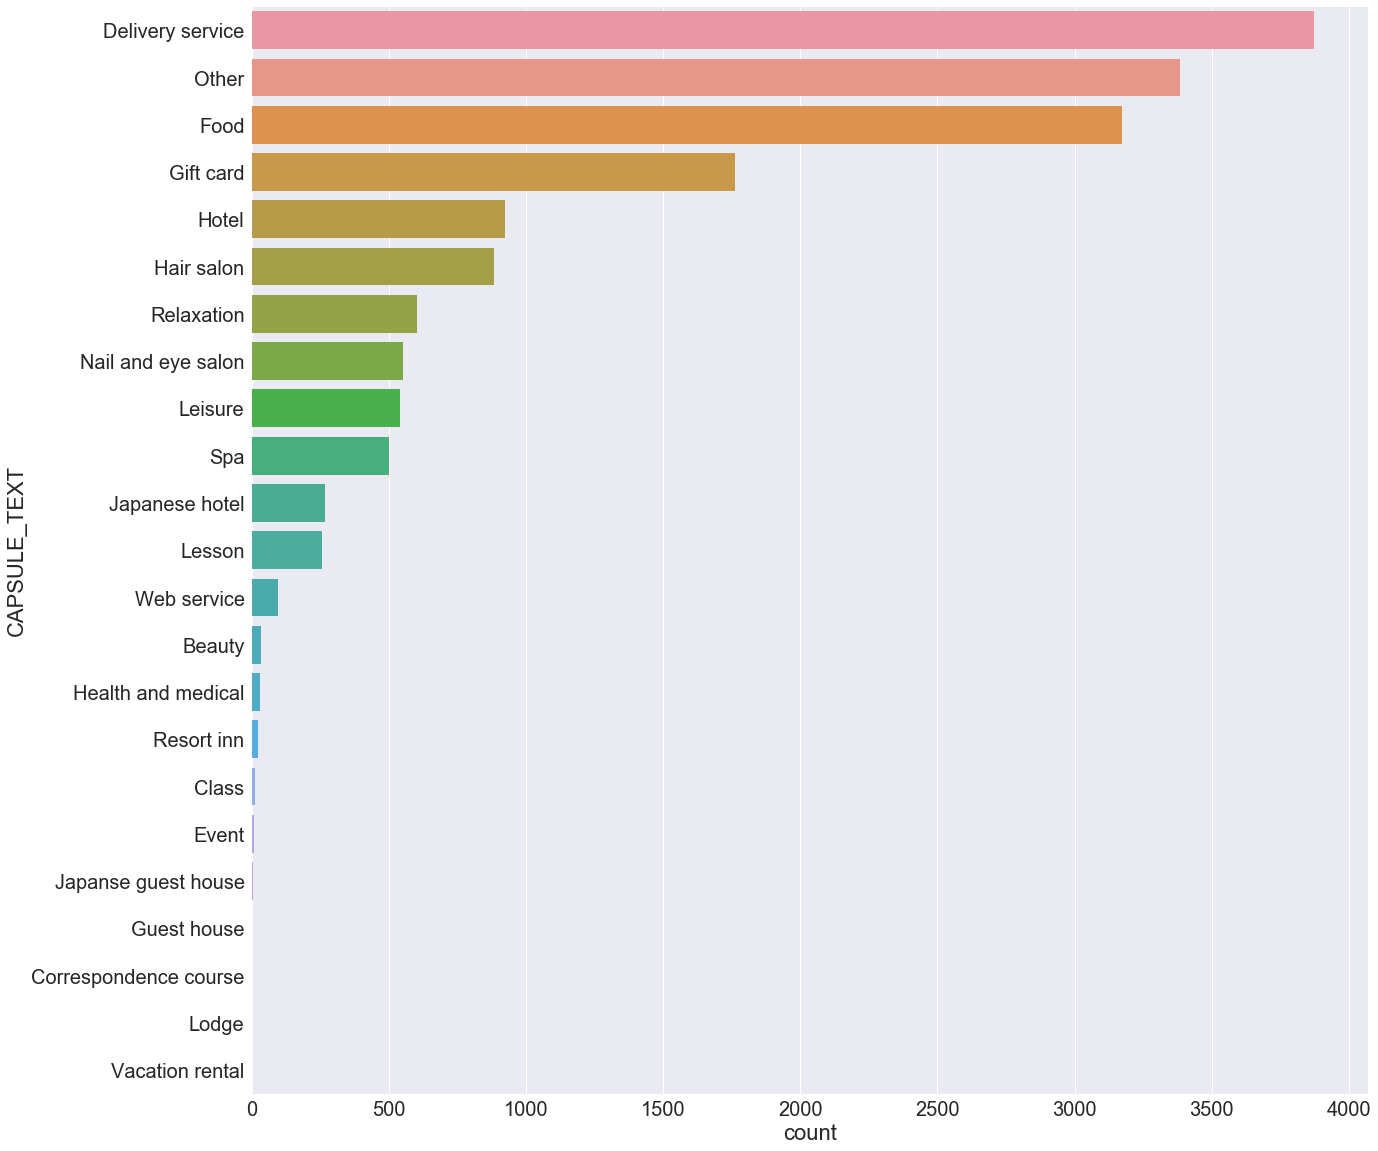

In [8]:
sns.set(font_scale=2)
plt.figure(figsize=(20, 20))
sns.countplot(y='CAPSULE_TEXT', data=twenty,order=twenty['CAPSULE_TEXT'].value_counts().index)

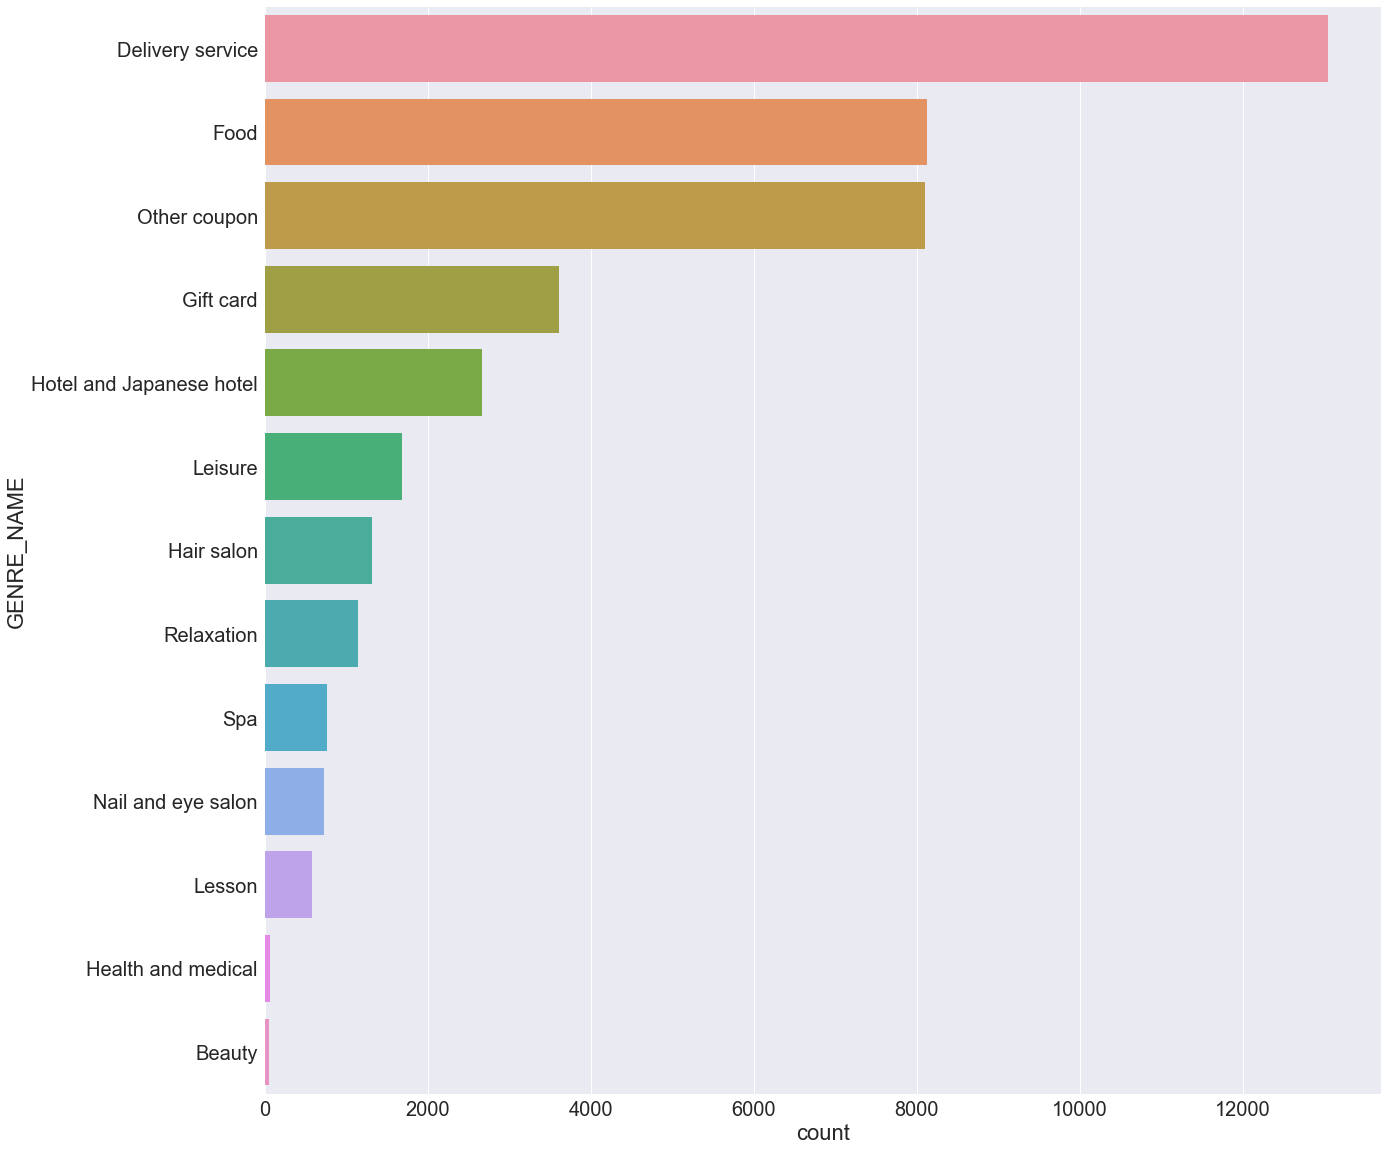

In [9]:
sns.set(font_scale=2)
plt.figure(figsize=(20, 20))
sns.countplot(y='GENRE_NAME', data=thirty,order=thirty['GENRE_NAME'].value_counts().index)

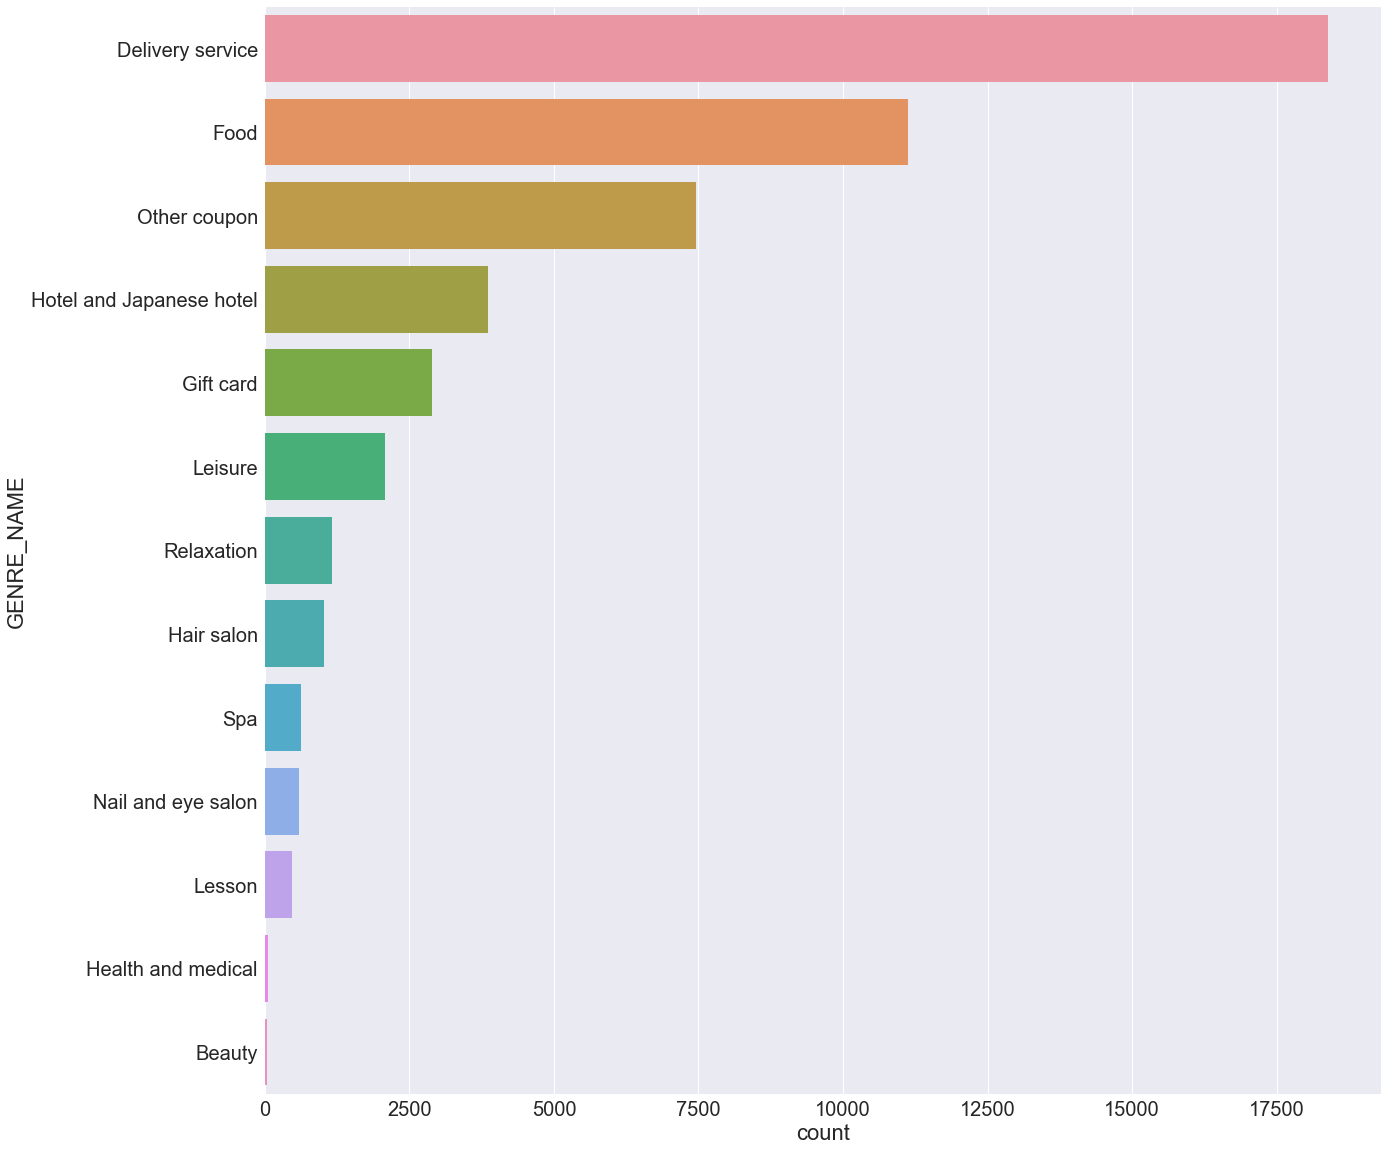

In [10]:
sns.set(font_scale=2)
plt.figure(figsize=(20, 20))
sns.countplot(y='GENRE_NAME', data=forty,order=forty['GENRE_NAME'].value_counts().index)

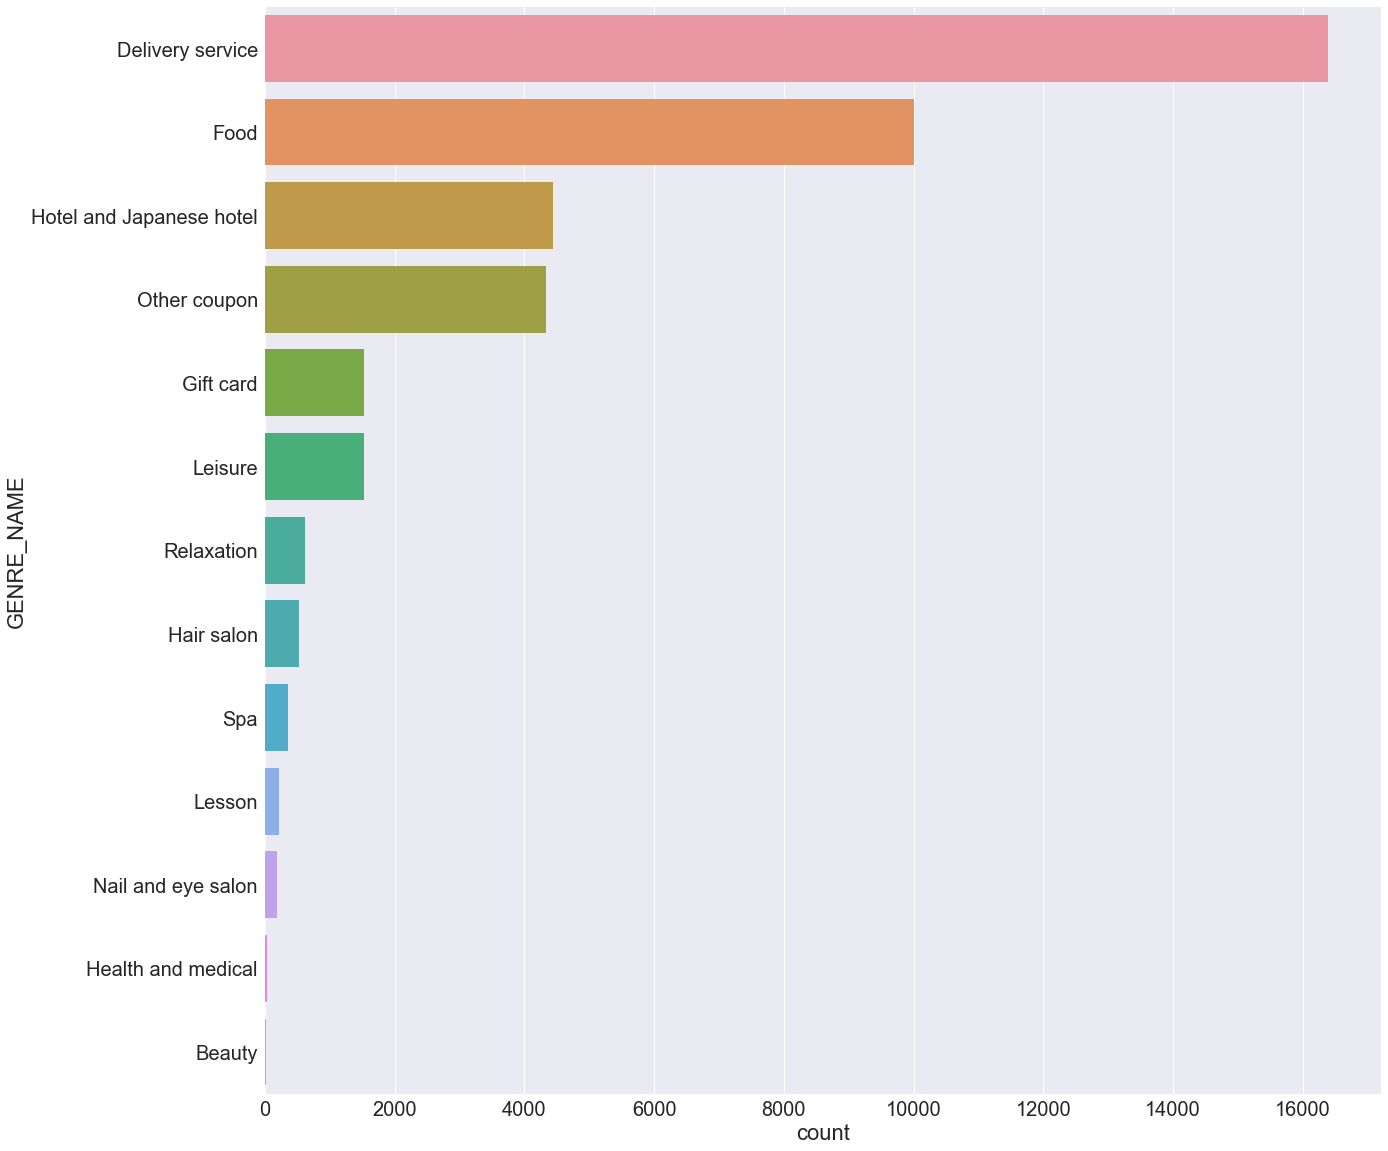

In [11]:
sns.set(font_scale=2)
plt.figure(figsize=(20, 20))
sns.countplot(y='GENRE_NAME', data=fifty,order=fifty['GENRE_NAME'].value_counts().index)

# 20대가 살짝 다르긴 하지만
# Delivery -> Food 순은 같음

In [12]:
user = g.user()

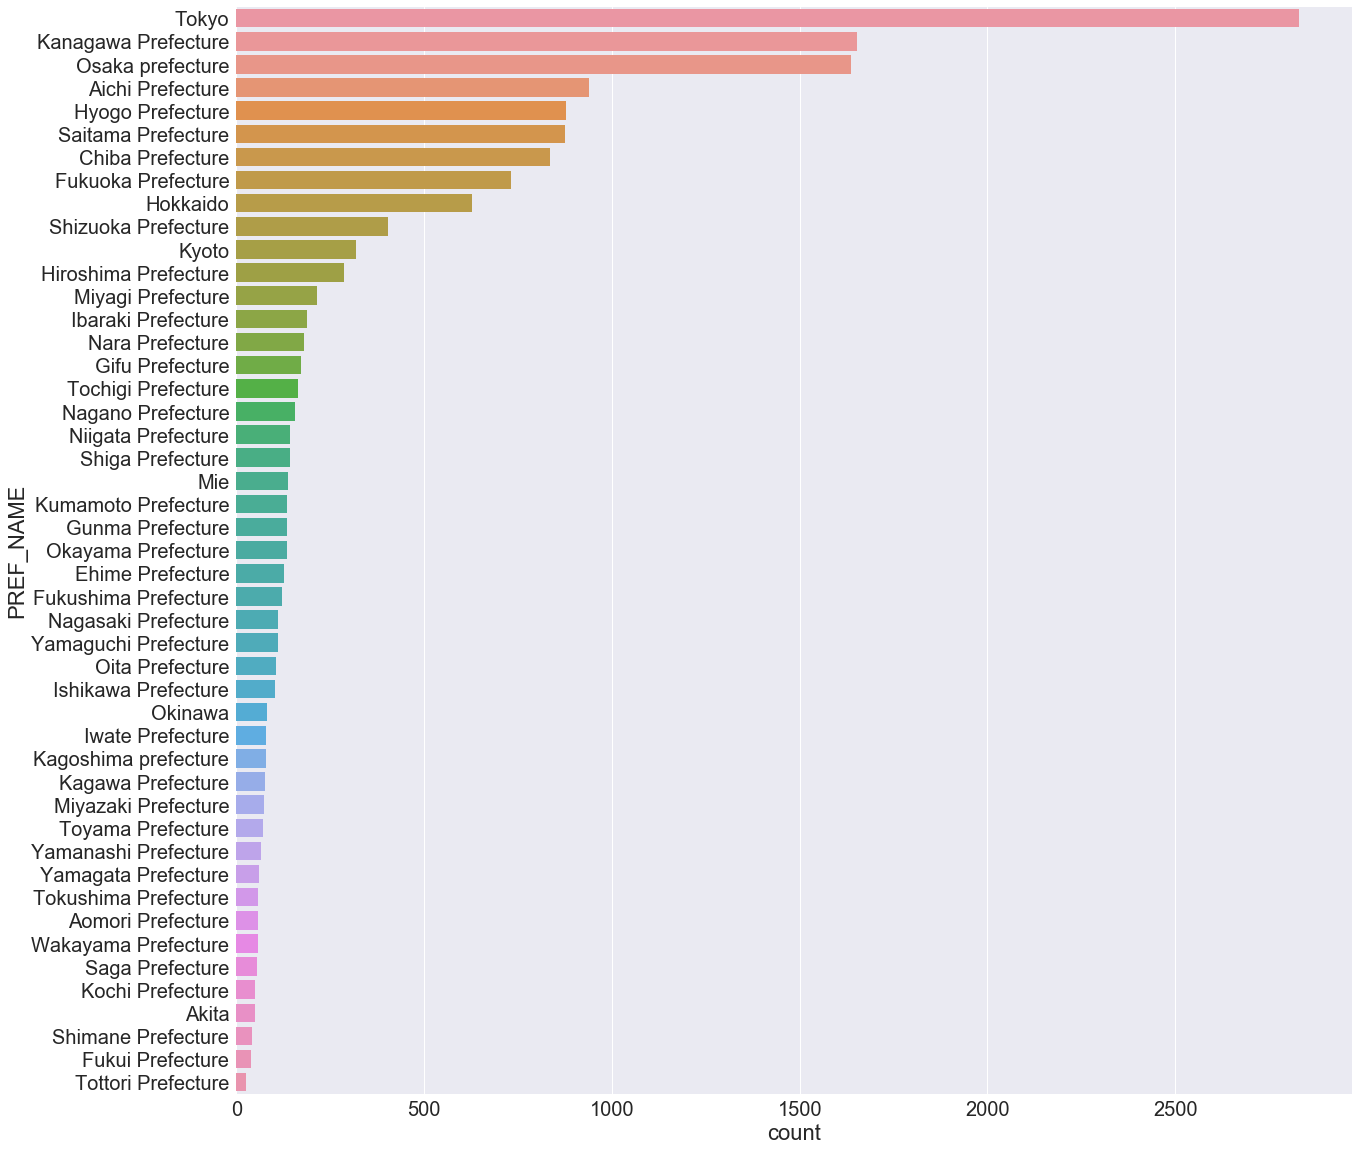

In [13]:
sns.set(font_scale=2)
plt.figure(figsize=(20, 20))
sns.countplot(y='PREF_NAME', data=user,order=user['PREF_NAME'].value_counts().index)